In [1]:
# import sys
# sys.path.append('../')

# from qiskit_utilities.mixers import *
from mixers import *

In [2]:
from IPython.display import display
np.set_printoptions(suppress=True)

In [3]:
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
    print("\x1b[31m"+mode+"\x1b[0m")
    for n in [1,2,3,4,5,6]:
        print("\x1b[32m"+str(n)+"\x1b[0m")
        
        T=get_T(2**n,mode)
        l,v=np.linalg.eigh(T)
        print(l[-1],v[:,-1]*np.sqrt(2**n))

standard
1
1.0 [1. 1.]
2
2.0 [1. 1. 1. 1.]
3
2.9999999999999996 [1. 1. 1. 1. 1. 1. 1. 1.]
4
4.000000000000002 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5
5.000000000000003 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
6
6.000000000000006 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
nearest_int
1
1.0 [1. 1.]
2
1.6180339887498942 [0.74349607 1.20300191 1.20300191 0.74349607]
3
1.879385241571817 [0.45602686 0.85705015 1.15470054 1.313077   1.313077   1.15470054
 0.85705015 0.45602686]
4
1.9659461993678033 [0.25210226 0.49561948 0.72225897 0.9243028  1.0948706  1.2281539
 1.3196139  1.36613602 1.36613602 1.3196139  1.2281539  1.0948706
 0.9243028  0.72225897 0.49561948 0.25210226]
5
1.9

In [4]:
n=4
T=get_T(n,'nearest_int')
print(T)
display(np.linalg.eig(T))
for k in reversed(range(1,n+1)):
    val=k*np.pi/(n+1)
    vec=np.sin(val*np.arange(1,n+1))
    print(2*np.cos(val),vec/np.linalg.norm(vec,2))

[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]


(array([-1.61803399, -0.61803399,  1.61803399,  0.61803399]),
 array([[ 0.37174803,  0.60150096, -0.37174803, -0.60150096],
        [-0.60150096, -0.37174803, -0.60150096, -0.37174803],
        [ 0.60150096, -0.37174803, -0.60150096,  0.37174803],
        [-0.37174803,  0.60150096, -0.37174803,  0.60150096]]))

-1.6180339887498947 [ 0.37174803 -0.60150096  0.60150096 -0.37174803]
-0.6180339887498947 [ 0.60150096 -0.37174803 -0.37174803  0.60150096]
0.6180339887498949 [ 0.60150096  0.37174803 -0.37174803 -0.60150096]
1.618033988749895 [0.37174803 0.60150096 0.60150096 0.37174803]


In [5]:
T=get_T(2**2,'standard')
np.linalg.eigh(T)

(array([-2., -0.,  0.,  2.]),
 array([[-0.5       , -0.70710678,  0.        ,  0.5       ],
        [ 0.5       ,  0.        , -0.70710678,  0.5       ],
        [ 0.5       ,  0.        ,  0.70710678,  0.5       ],
        [-0.5       ,  0.70710678,  0.        ,  0.5       ]]))

In [6]:
T=get_T(2**1,'nearest_int')
display(T)

print_info(['0','1'],T)

array([[0., 1.],
       [1., 0.]])

Hamming distance= (2, 0.2)


'H='

1.0*sigma1

#sqg, #cnots= (1, 0)


In [7]:
T=np.zeros((4,4))
T[0,1]=1
T[1,0]=1
display(T)

H=print_info(['00','01','10','11'],T)
T=np.zeros((4,4))
T[3,2]=1
T[2,3]=1
display(T)

print_info(['00','01','10','11'],T)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Hamming distance= (2, 0.2)


'H='

0.5*1xsigma1 + 0.5*sigma3xsigma1

#sqg, #cnots= (1, 2)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Hamming distance= (2, 0.2)


'H='

0.5*1xsigma1 - 0.5*sigma3xsigma1

#sqg, #cnots= (1, 2)


In [8]:
T=get_T(2**2,'full')
display(T)

print_info(['00','01','10','11'],T)

array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

Hamming distance= (16, 8.799999999999999)


'H='

1.0*1xsigma1 + 1.0*sigma1x1 + 1.0*sigma1xsigma1

#sqg, #cnots= (2, 2)


In [9]:
for n in [3,4,5]:
    print("\x1b[32m"+str(n)+"\x1b[0m")
    T=get_T(2**n,mode="standard",d=3)
    #print(" ---", T_sum_Hamming_distance(T))
    print_info(all_states(n),T,disp=True)
print("")

3
Hamming distance= (24, 24)


'H='

1.0*sigma1xsigma1xsigma1

#sqg, #cnots= (0, 4)
4
Hamming distance= (192, 192)


'H='

1.0*1xsigma1xsigma1xsigma1 + 1.0*sigma1x1xsigma1xsigma1 + 1.0*sigma1xsigma1x1xsigma1 + 1.0*sigma1xsigma1xsigma1x1

#sqg, #cnots= (0, 16)
5
Hamming distance= (960, 960)


'H='

1.0*1x1xsigma1xsigma1xsigma1 + 1.0*1xsigma1x1xsigma1xsigma1 + 1.0*1xsigma1xsigma1x1xsigma1 + 1.0*1xsigma1xsigma1xsigma1x1 + 1.0*sigma1x1x1xsigma1xsigma1 + 1.0*sigma1x1xsigma1x1xsigma1 + 1.0*sigma1x1xsigma1xsigma1x1 + 1.0*sigma1xsigma1x1x1xsigma1 + 1.0*sigma1xsigma1x1xsigma1x1 + 1.0*sigma1xsigma1xsigma1x1x1

#sqg, #cnots= (0, 40)



In [10]:
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full","random"]:
    print("\x1b[31m"+mode+"\x1b[0m")
    for n in [1,2,3,4,5,6]:
        print("\x1b[32m"+str(n)+"\x1b[0m")
        T=get_T(2**n,mode=mode)
        #print(" ---", T_sum_Hamming_distance(T))
        print_info(all_states(n),T,disp=False,disp_H=False)
    print("")

standard
1
Hamming distance= (2, 0.2)
#sqg, #cnots= (1, 0)
2
Hamming distance= (8, 0.7999999999999999)
#sqg, #cnots= (2, 0)
3
Hamming distance= (24, 2.400000000000001)
#sqg, #cnots= (3, 0)
4
Hamming distance= (64, 6.399999999999993)
#sqg, #cnots= (4, 0)
5
Hamming distance= (160, 15.99999999999996)
#sqg, #cnots= (5, 0)
6
Hamming distance= (384, 38.400000000000276)
#sqg, #cnots= (6, 0)

nearest_int
1
Hamming distance= (2, 0.2)
#sqg, #cnots= (1, 0)
2
Hamming distance= (8, 4.3999999999999995)
#sqg, #cnots= (1, 4)
3
Hamming distance= (22, 14.799999999999997)
#sqg, #cnots= (1, 20)
4
Hamming distance= (52, 37.60000000000001)
#sqg, #cnots= (1, 68)
5
Hamming distance= (114, 85.19999999999997)
#sqg, #cnots= (1, 196)
6
Hamming distance= (240, 182.3999999999998)
#sqg, #cnots= (1, 516)

nearest_int_cyclic
1
Hamming distance= (2, 0.2)
#sqg, #cnots= (1, 0)
2
Hamming distance= (12, 8.4)
#sqg, #cnots= (1, 2)
3
Hamming distance= (28, 20.8)
#sqg, #cnots= (1, 12)
4
Hamming distance= (60, 45.60000000000001

In [11]:
import math
def possibilities_full(n):
    val=0
    for i in range(n+1):
        val+=i*math.comb(n,i)
    return val
for n in [1,2,3,4]:
    T=np.ones((2**n,2**n))
    display(T)

    print(2**n*possibilities_full(n))
    print_info(all_states(n),T)

array([[1., 1.],
       [1., 1.]])

2
Hamming distance= (2, 0.2)


'H='

1.0 + 1.0*sigma1

#sqg, #cnots= (1, 0)


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

16
Hamming distance= (16, 8.799999999999999)


'H='

1.0*1x1 + 1.0*1xsigma1 + 1.0*sigma1x1 + 1.0*sigma1xsigma1

#sqg, #cnots= (2, 2)


array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

96
Hamming distance= (96, 74.4)


'H='

1.0*1x1x1 + 1.0*1x1xsigma1 + 1.0*1xsigma1x1 + 1.0*1xsigma1xsigma1 + 1.0*sigma1x1x1 + 1.0*sigma1x1xsigma1 + 1.0*sigma1xsigma1x1 + 1.0*sigma1xsigma1xsigma1

#sqg, #cnots= (3, 10)


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

512
Hamming distance= (512, 454.4000000000005)


'H='

1.0*1x1x1x1 + 1.0*1x1x1xsigma1 + 1.0*1x1xsigma1x1 + 1.0*1x1xsigma1xsigma1 + 1.0*1xsigma1x1x1 + 1.0*1xsigma1x1xsigma1 + 1.0*1xsigma1xsigma1x1 + 1.0*1xsigma1xsigma1xsigma1 + 1.0*sigma1x1x1x1 + 1.0*sigma1x1x1xsigma1 + 1.0*sigma1x1xsigma1x1 + 1.0*sigma1x1xsigma1xsigma1 + 1.0*sigma1xsigma1x1x1 + 1.0*sigma1xsigma1x1xsigma1 + 1.0*sigma1xsigma1xsigma1x1 + 1.0*sigma1xsigma1xsigma1xsigma1

#sqg, #cnots= (4, 34)


In [13]:
import tikzplotlib

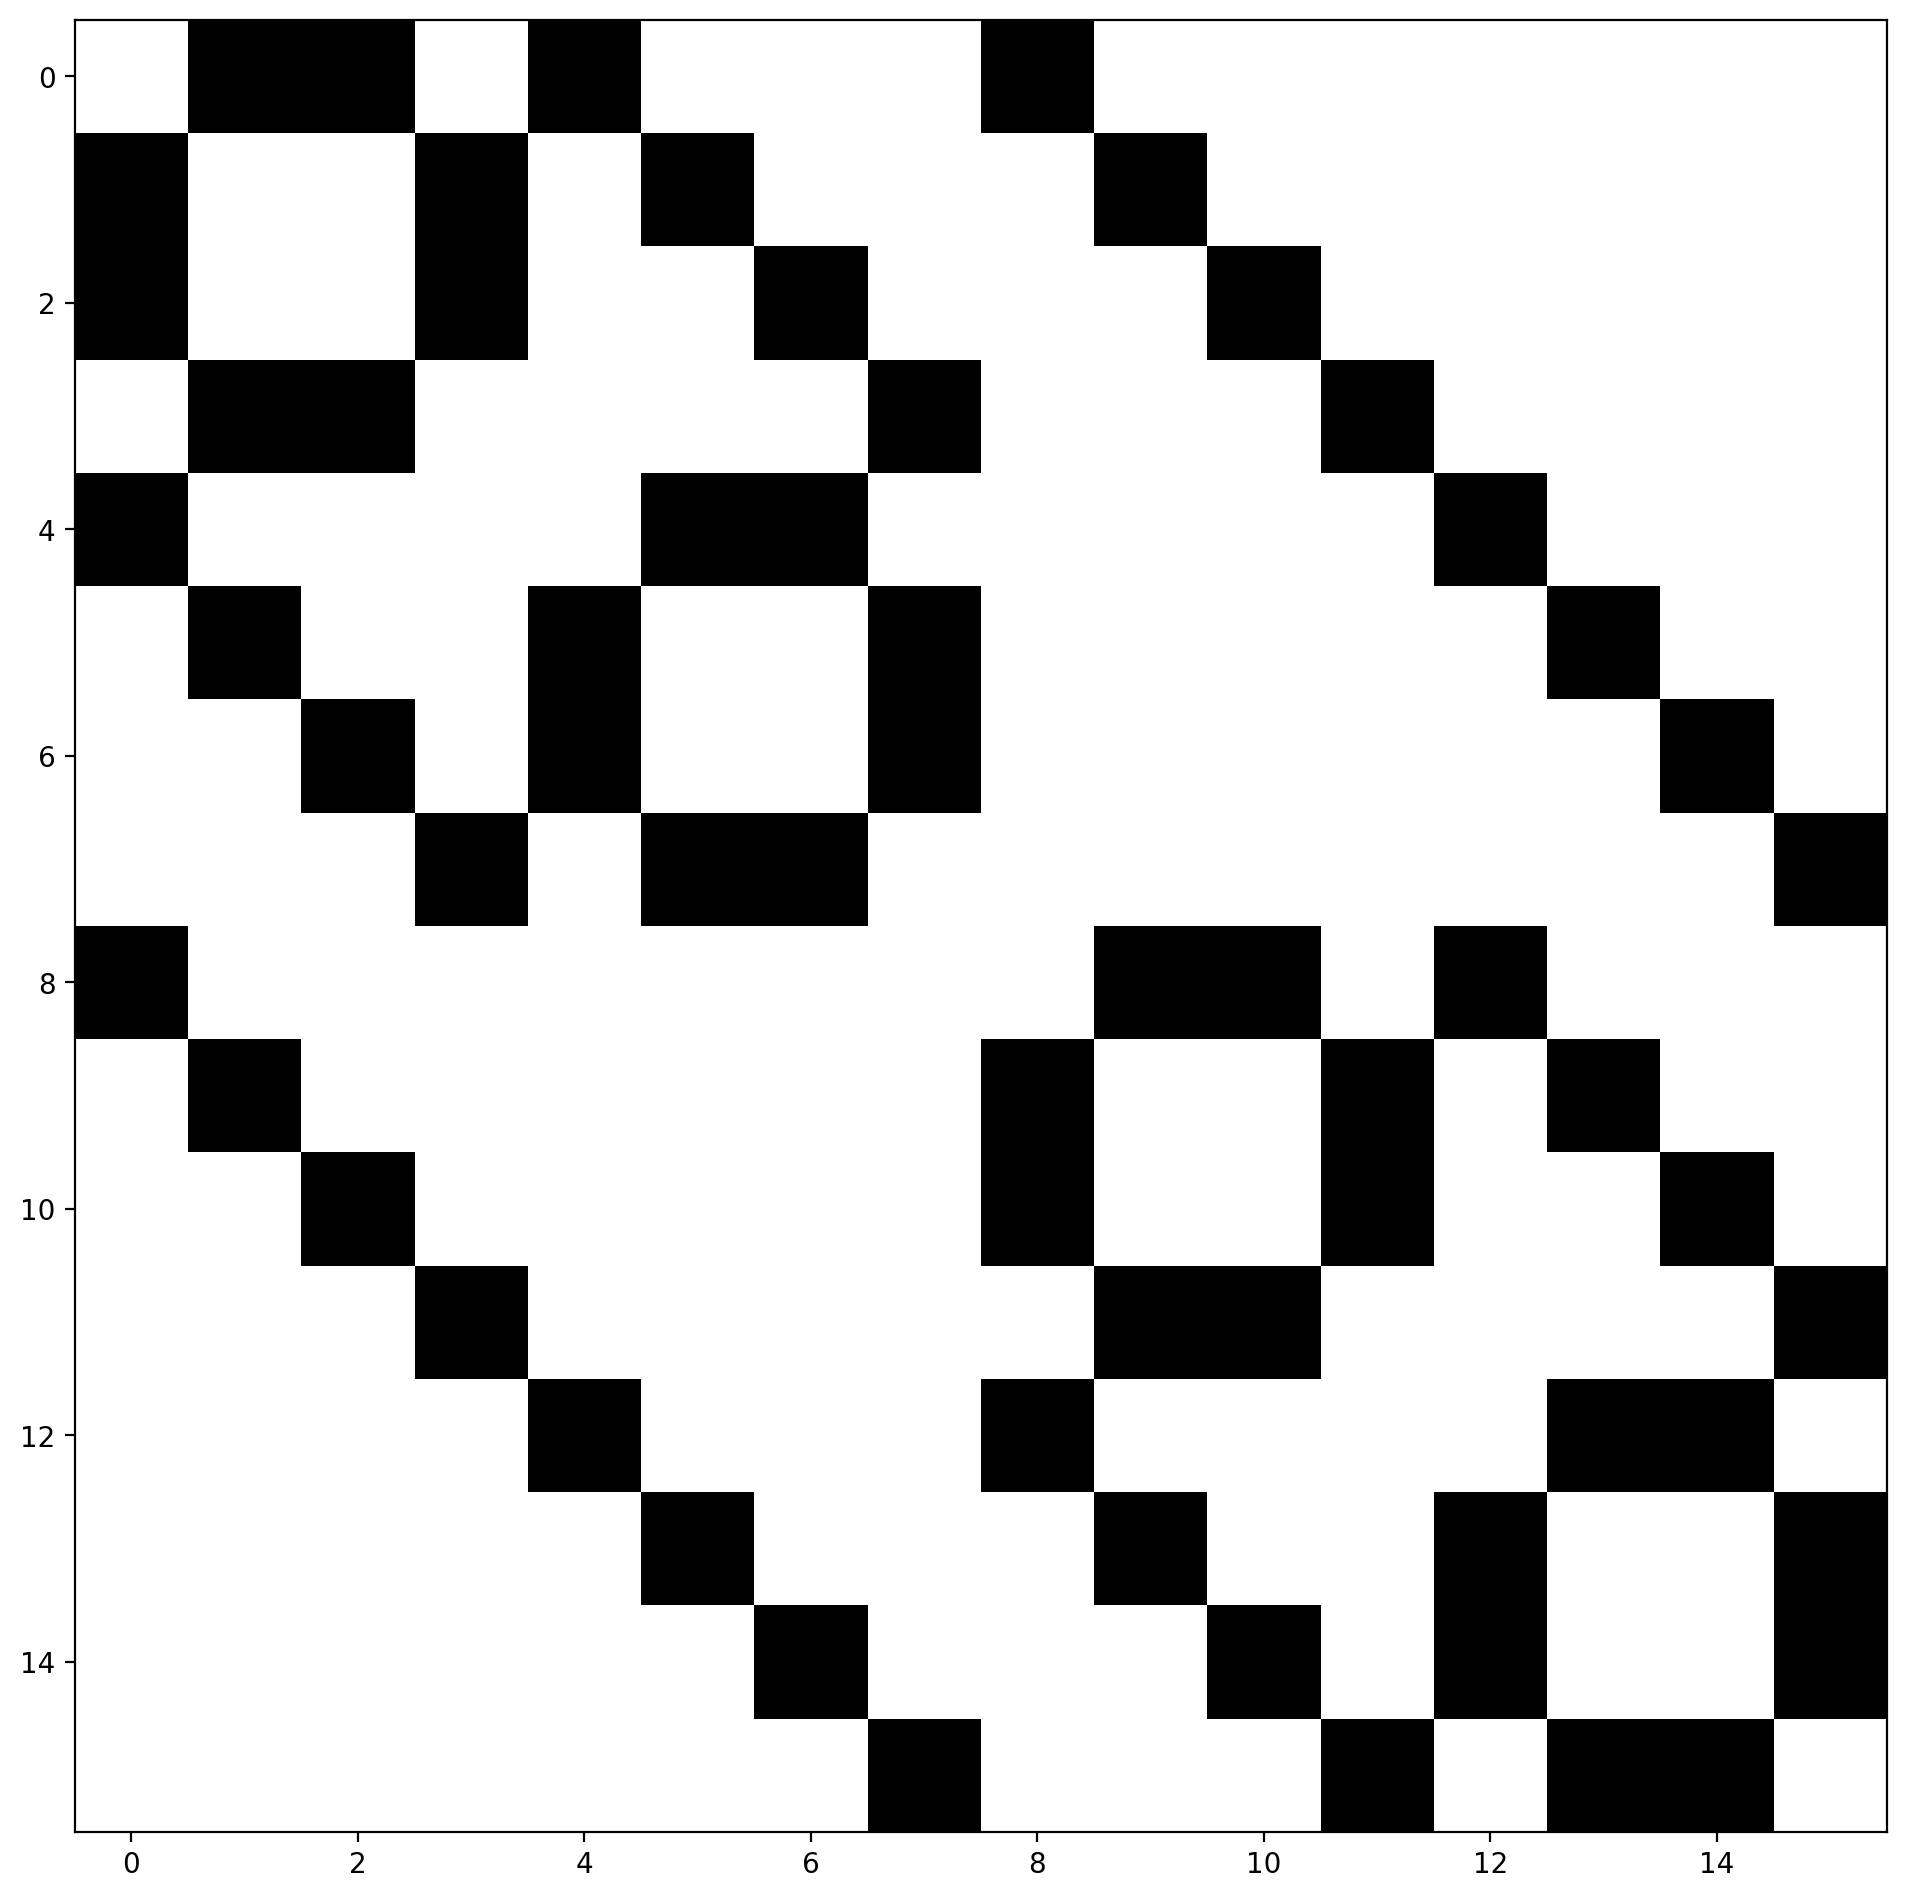

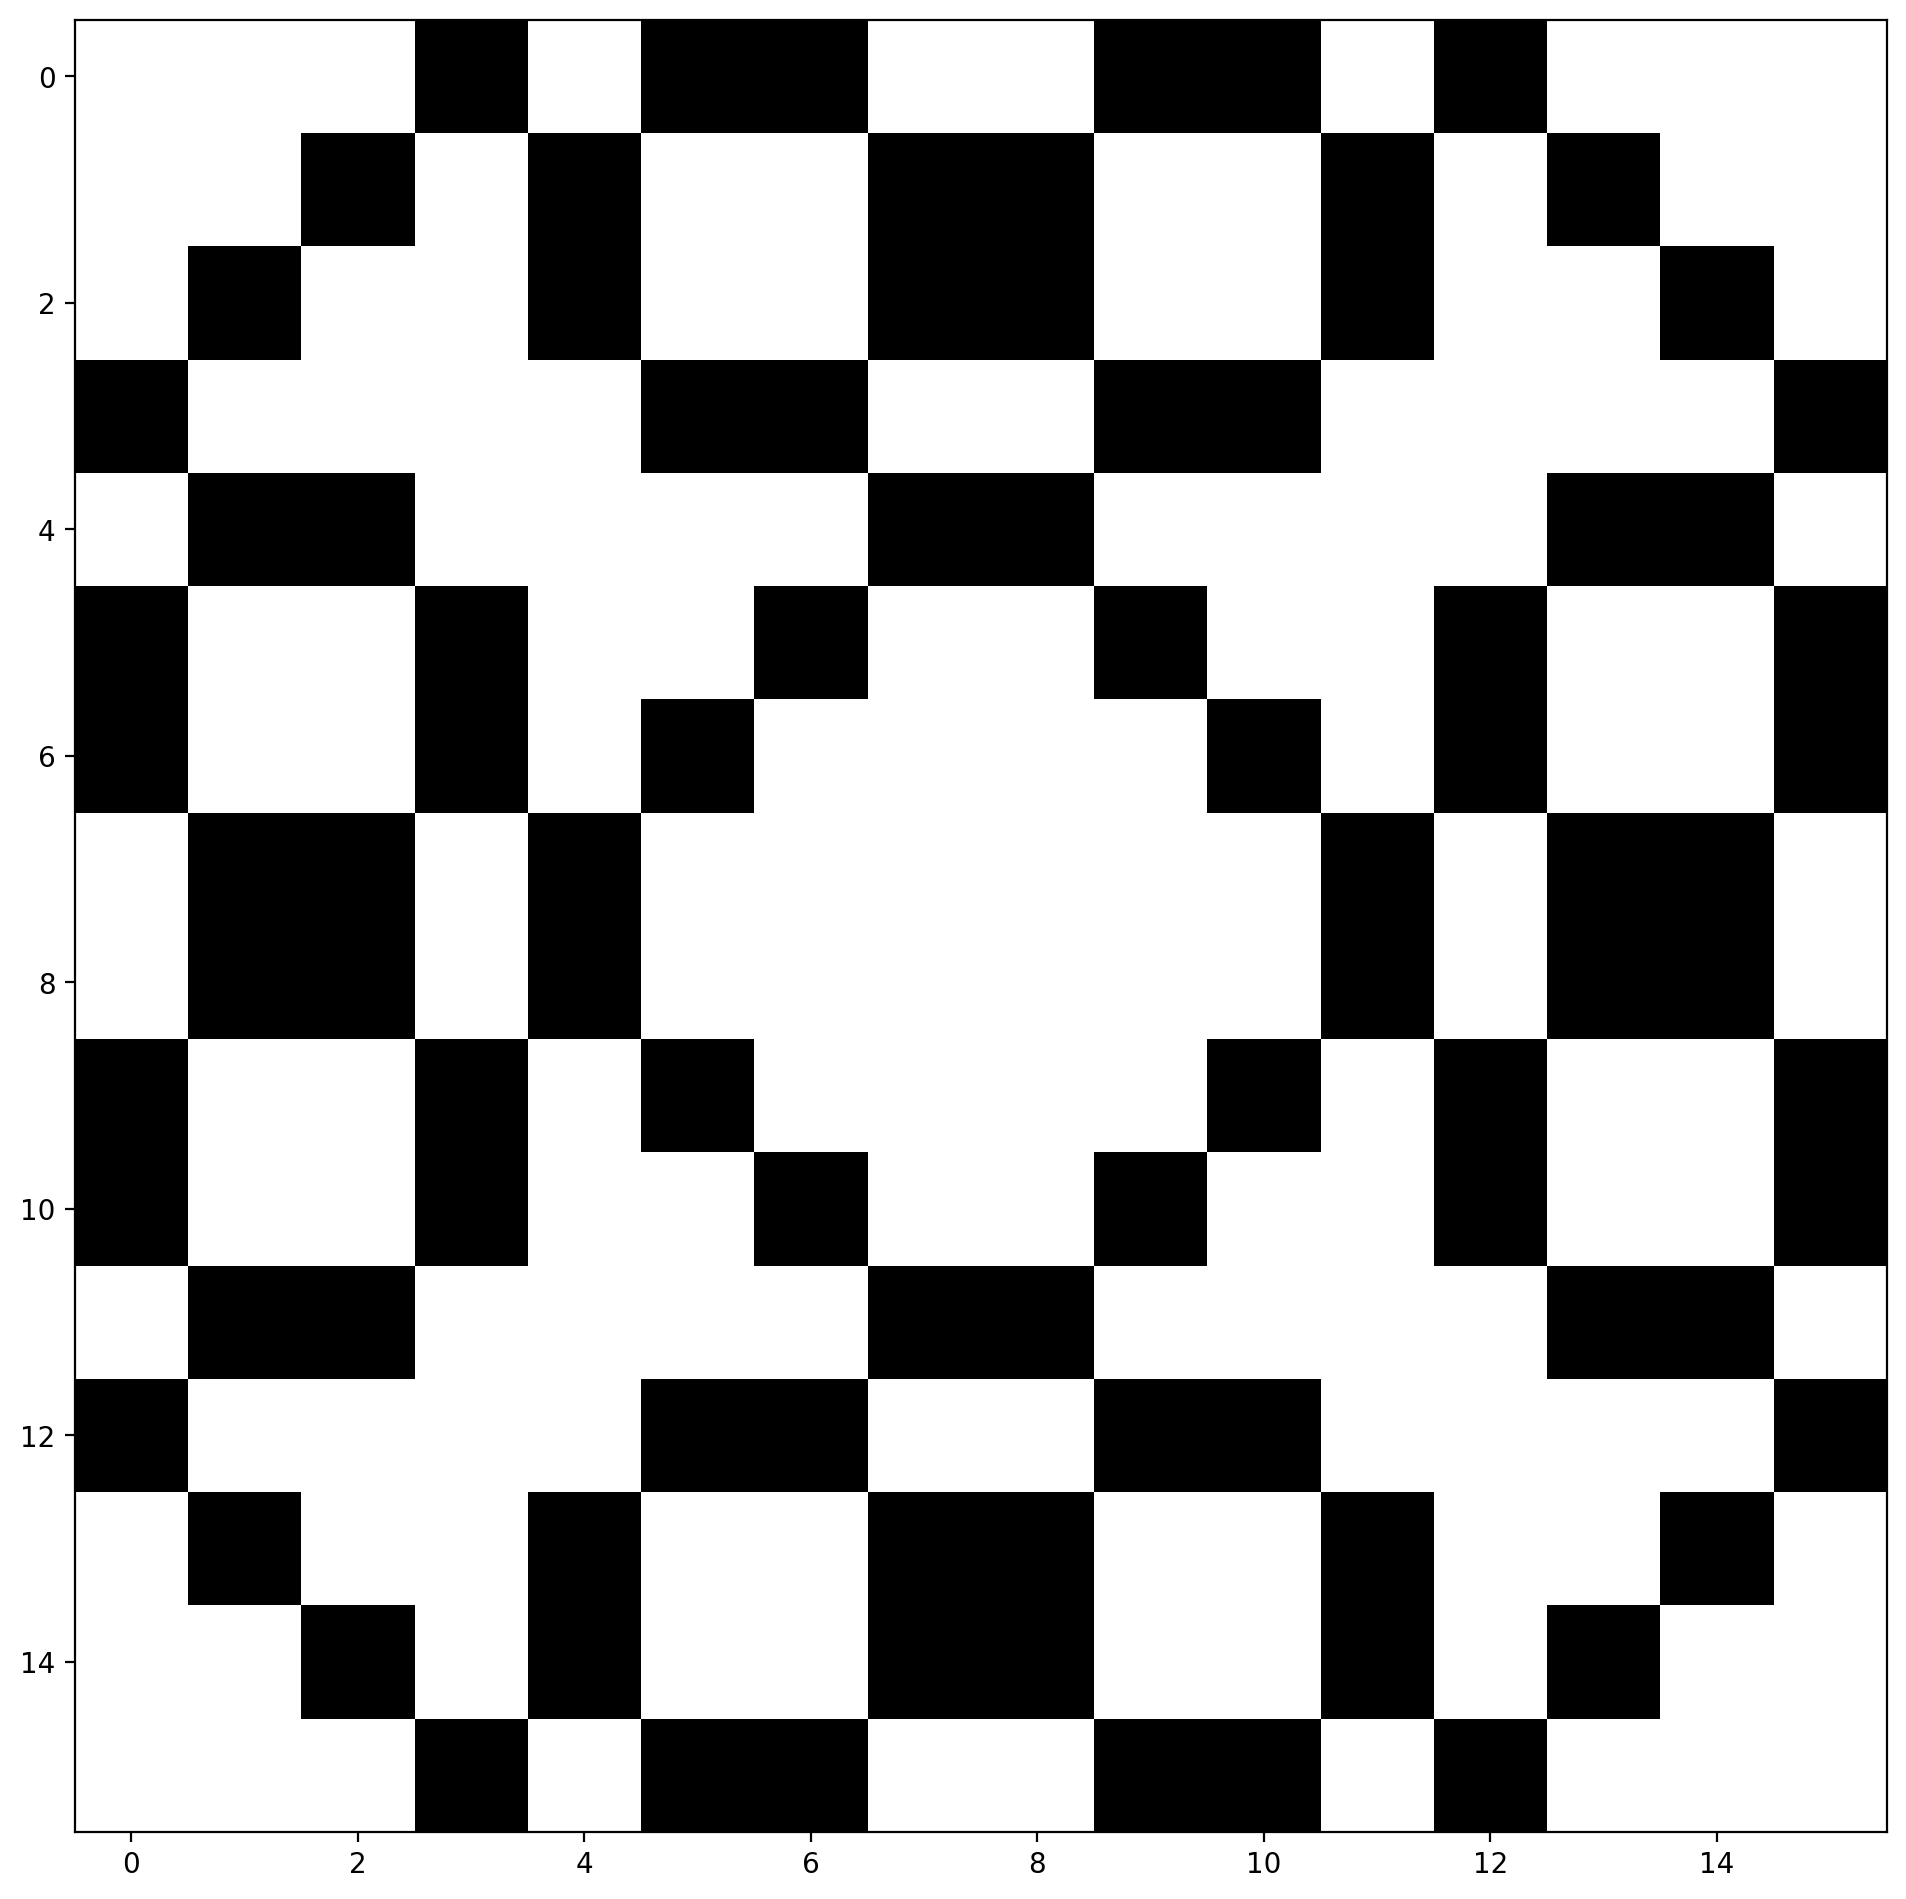

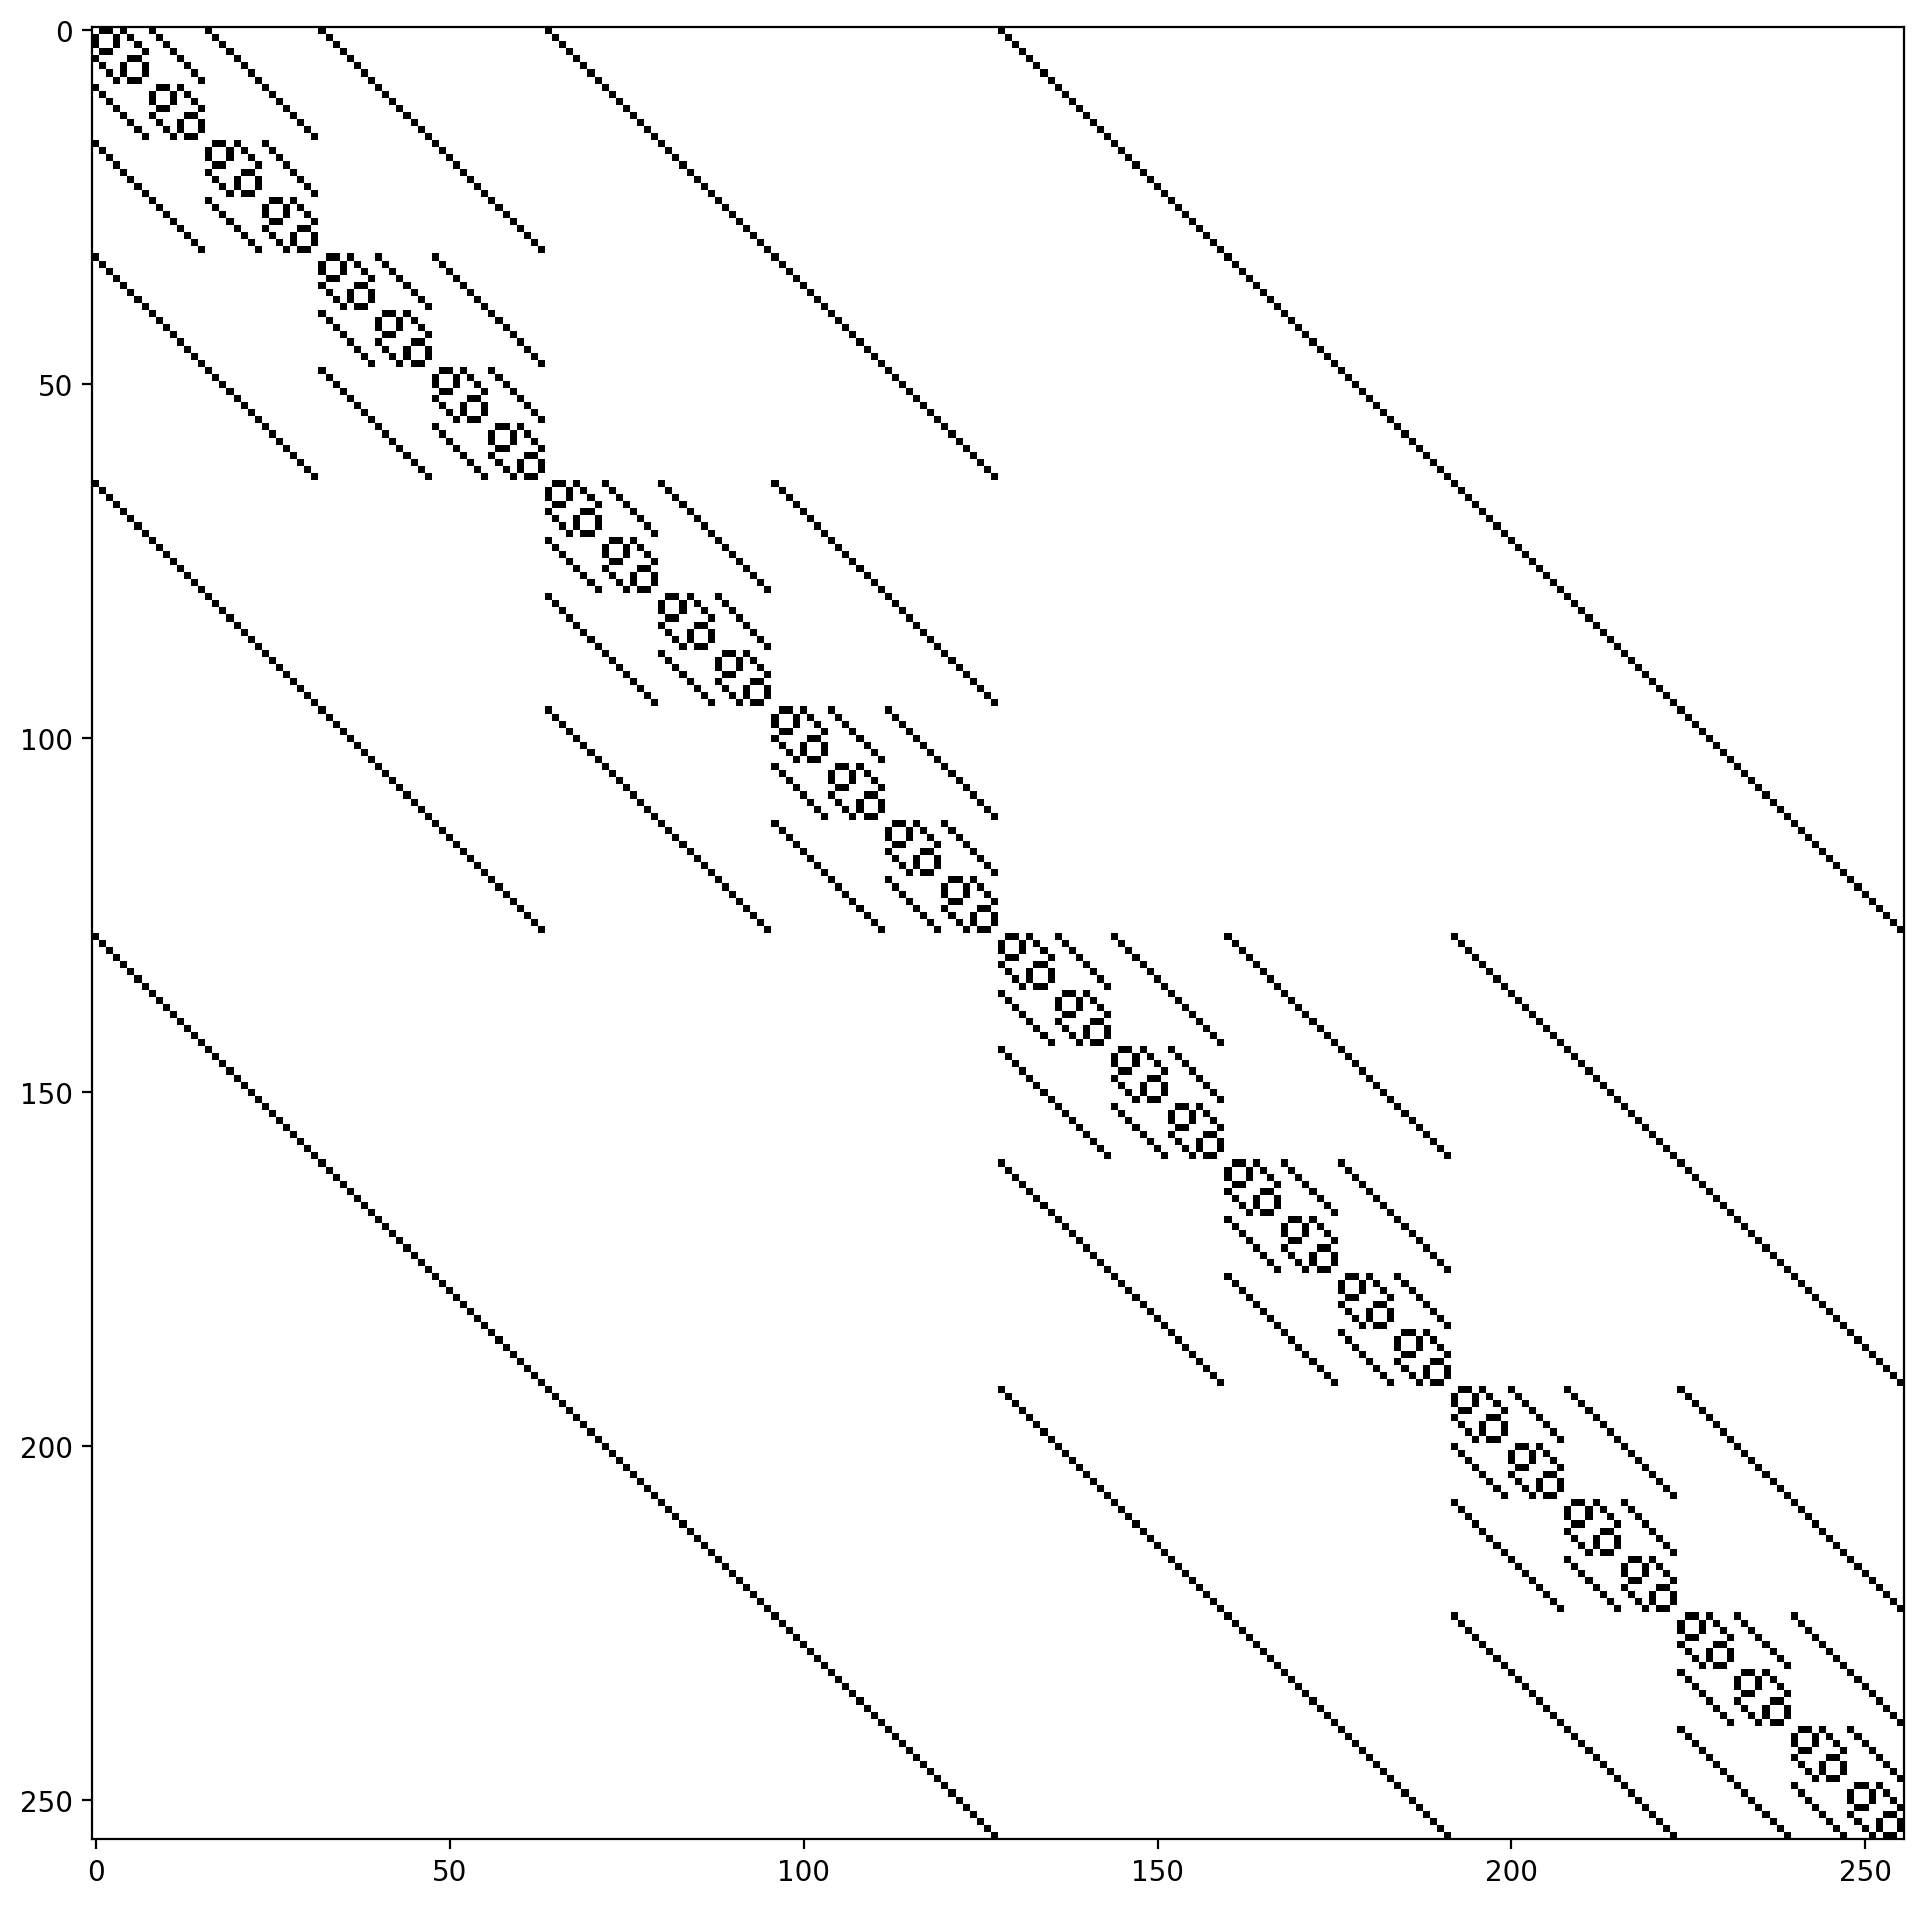

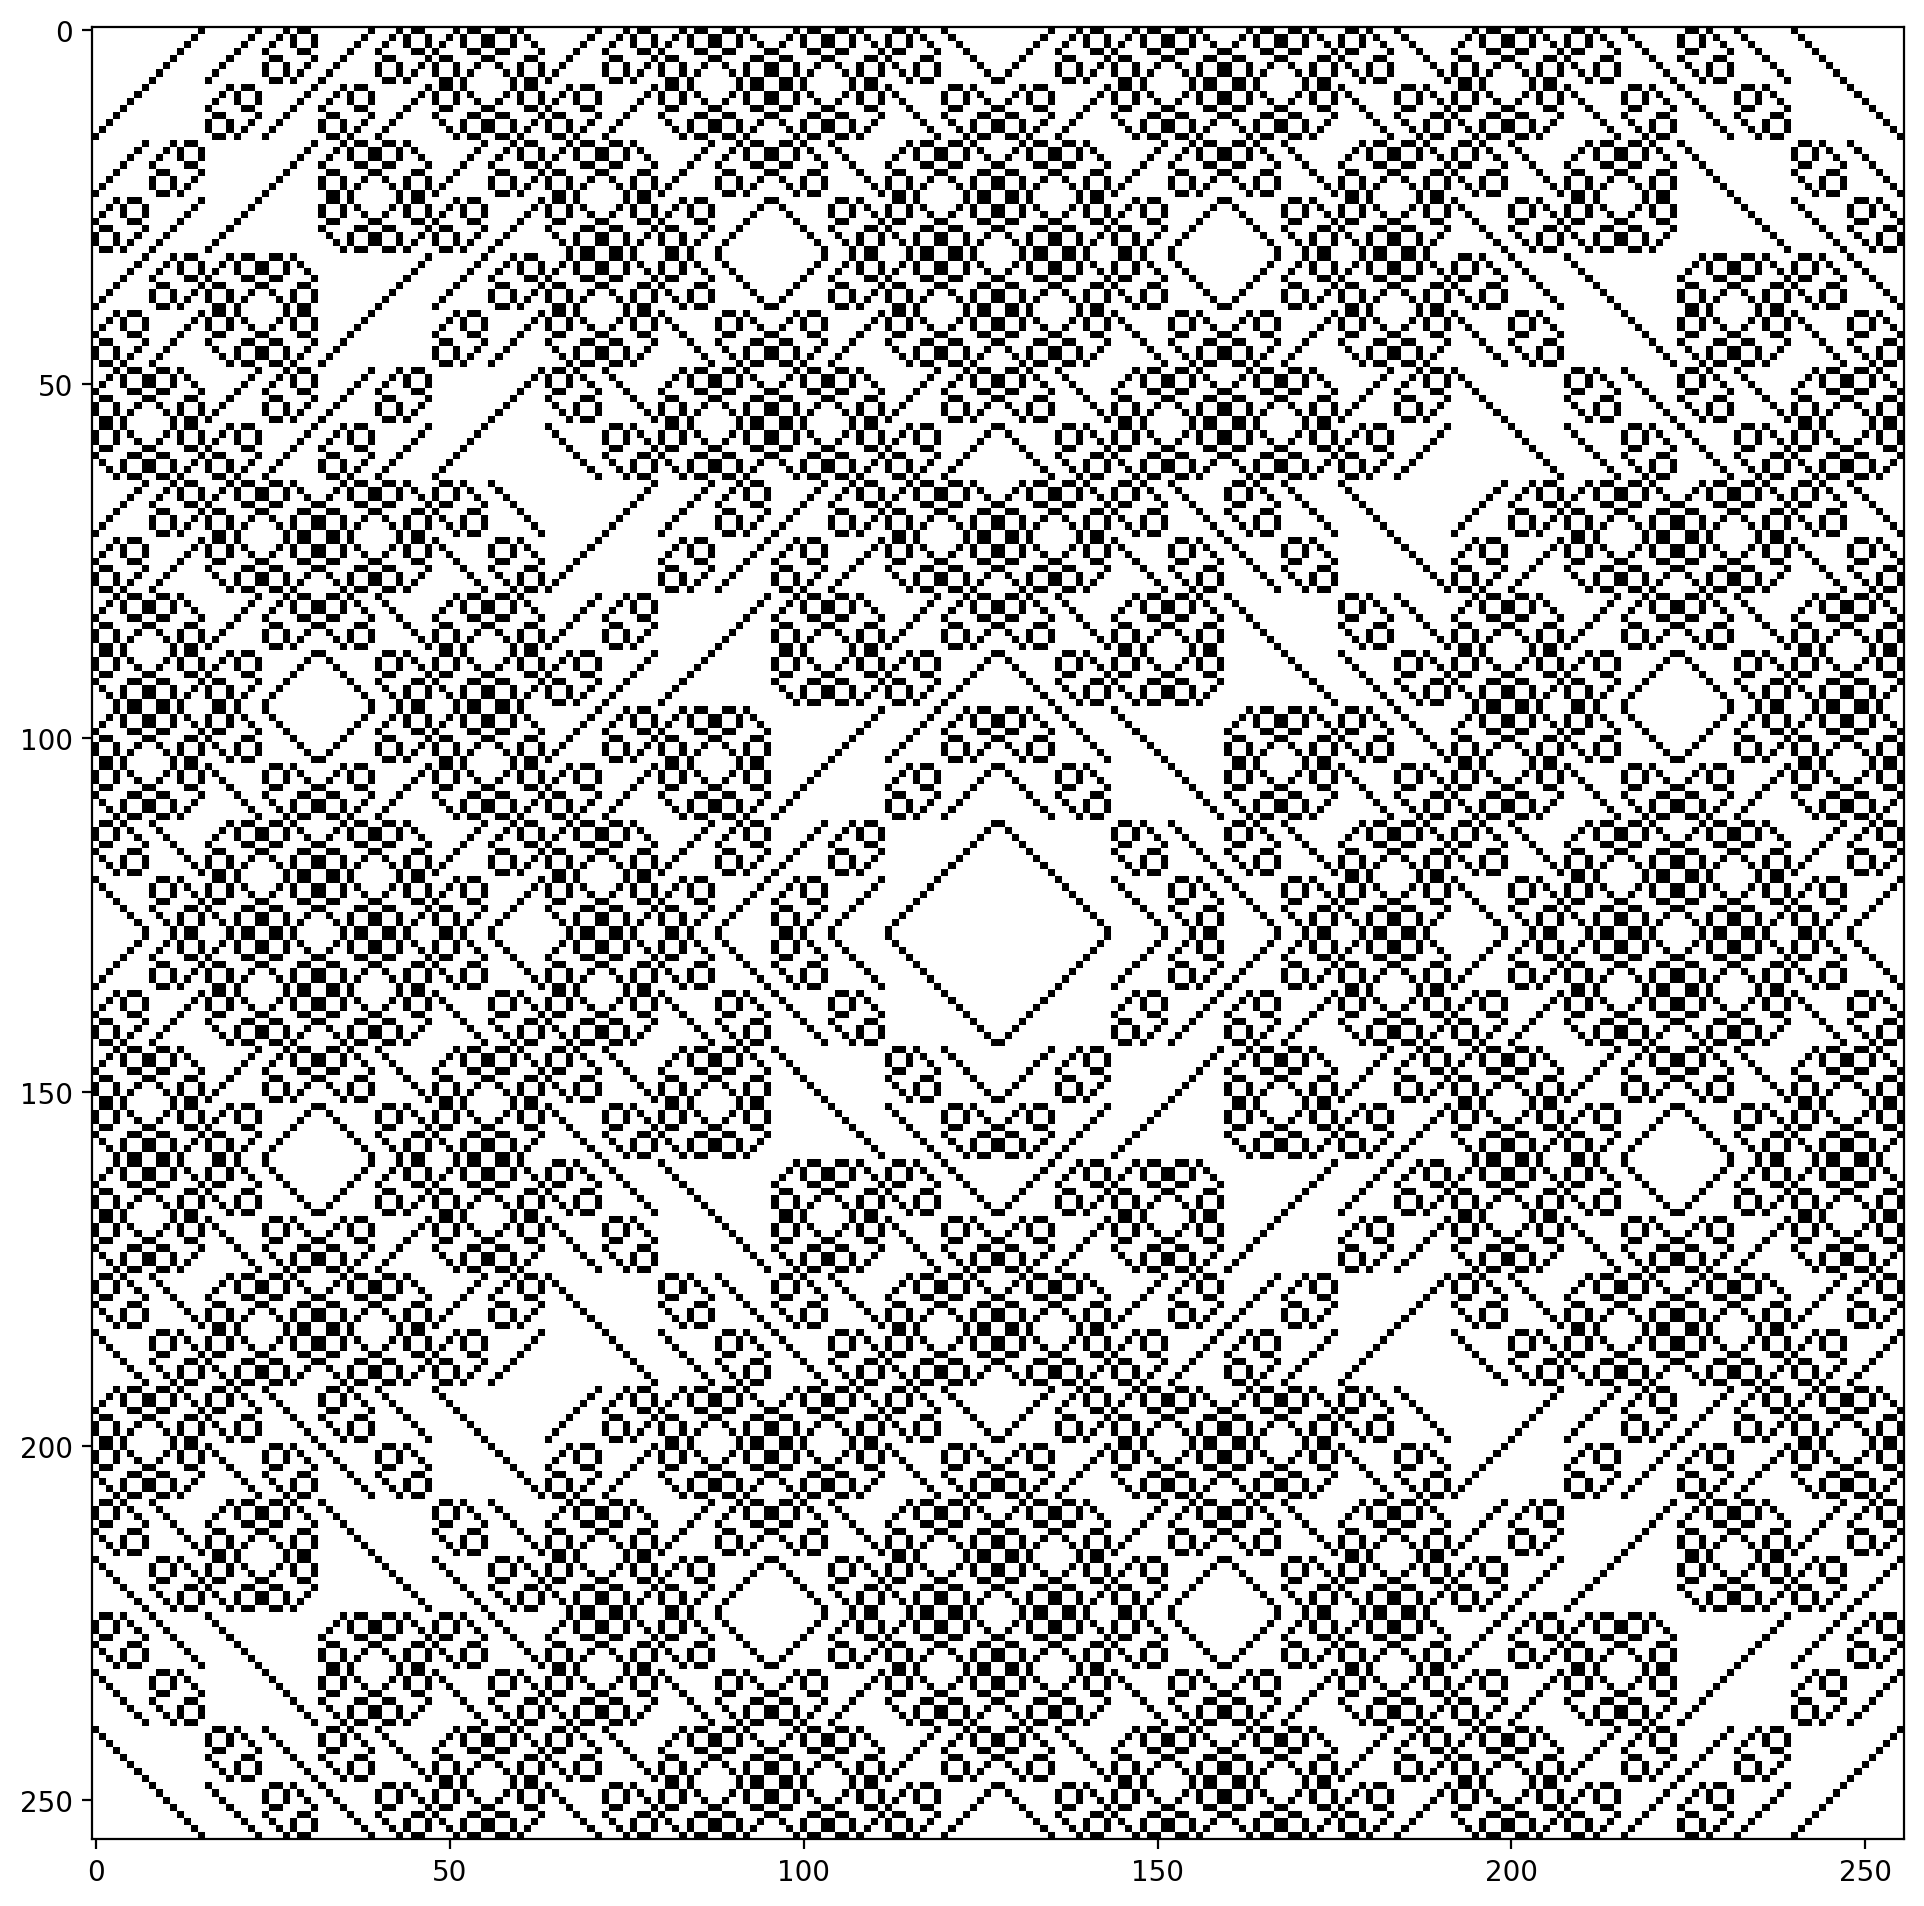

In [14]:
import matplotlib.pyplot as pl
fig=pl.figure(figsize=(12, 12), dpi=200)
pl.imshow(1-get_T(2**4,mode='standard',d=1), cmap=pl.cm.gray)
# tikzplotlib.clean_figure(dpi=1000)
tikzplotlib.save("Tn4_d1.tex",dpi=1000)
fig=pl.figure(figsize=(12, 12), dpi=200)
pl.imshow(1-get_T(2**4,mode='standard',d=2), cmap=pl.cm.gray)
tikzplotlib.save("Tn4_d2.tex")
fig=pl.figure(figsize=(12, 12), dpi=200)
pl.imshow(1-get_T(2**8,mode='standard',d=1), cmap=pl.cm.gray)
tikzplotlib.save("Tn8_d1.tex")
fig=pl.figure(figsize=(12, 12), dpi=200)
pl.imshow(1-get_T(2**8,mode='standard',d=4), cmap=pl.cm.gray)
tikzplotlib.save("Tn8_d4.tex")
# pl.xticks([0,2**7,2**8-1],["{0:b}".format(0).zfill(8),"{0:b}".format(2**7).zfill(8),"{0:b}".format(2**8-1).zfill(8)])
# pl.yticks([0,2**7,2**8-1],["{0:b}".format(0).zfill(8),"{0:b}".format(2**7).zfill(8),"{0:b}".format(2**8-1).zfill(8)])

In [15]:
def getT_test(n,wrap=True):
    T=np.zeros((2**n,2**n))
    for i in range(2**n-1):
        T[i,i+1]=1
        T[i+1,i]=1
        if wrap:
            T[0,-1]=1
            T[-1,0]=1
    return T

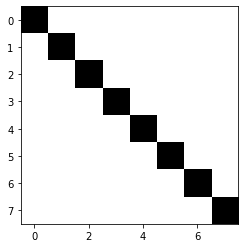

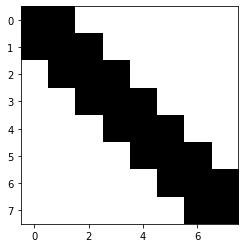

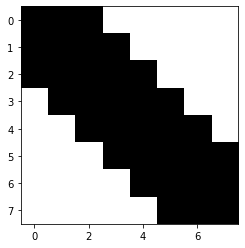

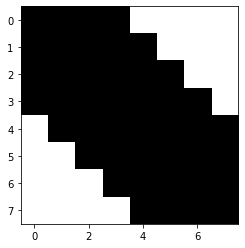

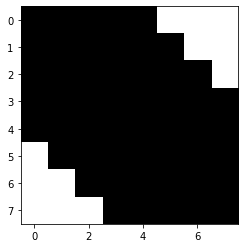

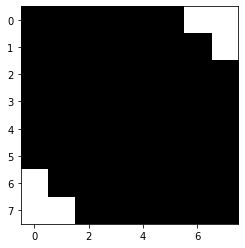

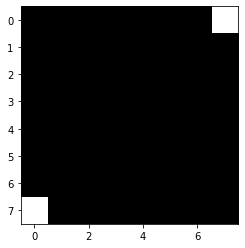

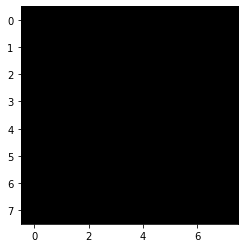

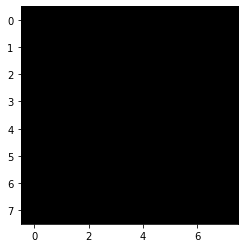

In [16]:
import matplotlib.pyplot as pl
T={}
TF=getT_test(3,False)
for k in range(9):
    T[k] = 1-(np.linalg.matrix_power(TF,k)>0)

TS=0*TF
for k in range(9):
    fig=pl.figure()#figsize=(12, 12), dpi=200)
    TS+=np.abs(np.linalg.matrix_power(TF,k))
    pl.imshow(1-(TS>0), cmap=pl.cm.gray)

In [17]:
T12=np.zeros((3,3))
T12[0,1]=1
T12[1,0]=1
T23=np.zeros((3,3))
T23[1,2]=1
T23[2,1]=1
T12,T23

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]))

In [18]:
T23_2=np.matmul(T23,T23)
T12_2=np.matmul(T12,T12)
T23_3=np.matmul(T23_2,T23)
T12_3=np.matmul(T12_2,T12)
np.matmul(T12,T23), np.matmul(T12,T23_2),np.matmul(T12,T23_3)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [19]:
np.matmul(T12_2,T23), np.matmul(T12_3,T23)

(array([[0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [20]:
np.matmul(T12_2,T23_2),np.matmul(T12_2,T23_3), np.matmul(T12_3,T23_2),np.matmul(T12_3,T23_3)

(array([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [24]:
from scipy.linalg import expm

In [25]:
pl.rcParams.update({'font.size': 22})

samp=200
t=np.linspace(0,4*np.pi,samp)

T={}
ov0={}
ov1={}
ov2={}
ov3={}
for i in range(0,3):
    for j in range(0,3):
        ov0[str(i)+"<->"+str(j)]=np.zeros_like(t)
        ov1[str(i)+"<->"+str(j)]=np.zeros_like(t)
        ov2[str(i)+"<->"+str(j)]=np.zeros_like(t)
        ov3[str(i)+"<->"+str(j)]=np.zeros_like(t)
        for s in range(samp):
            eT0=np.matmul(expm(-1j*t[s]*T23),expm(-1j*t[s]*T12))
            eT1=np.matmul(expm(-1j*t[s]*T12),expm(-1j*t[s]*T23))
            eT2=np.matmul(eT1,expm(-1j*t[s]*T12))
            eT3=np.matmul(eT2,expm(-1j*t[s]*T23))
            ov0[str(i)+"<->"+str(j)][s]=np.abs(eT0[i,j])**2
            ov1[str(i)+"<->"+str(j)][s]=np.abs(eT1[i,j])**2
            ov2[str(i)+"<->"+str(j)][s]=np.abs(eT2[i,j])**2
            ov3[str(i)+"<->"+str(j)][s]=np.abs(eT3[i,j])**2

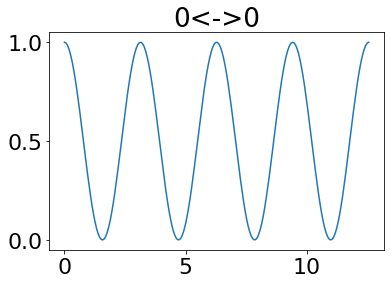

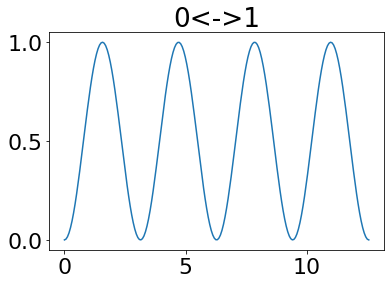

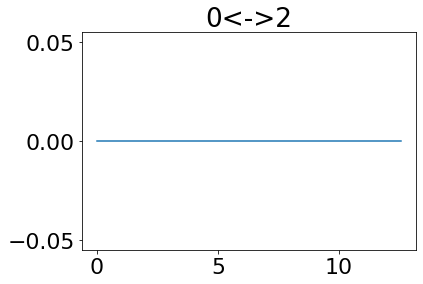

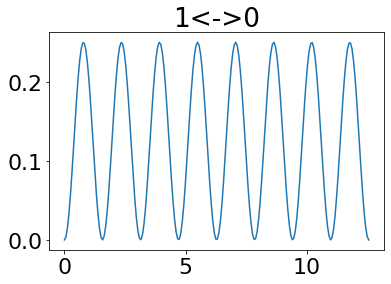

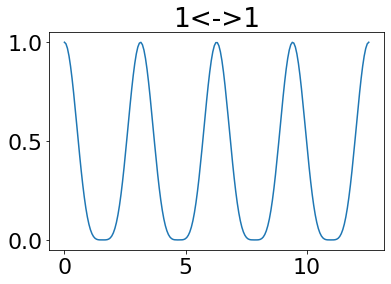

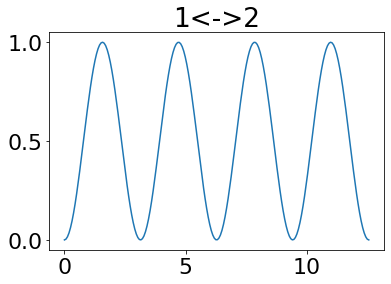

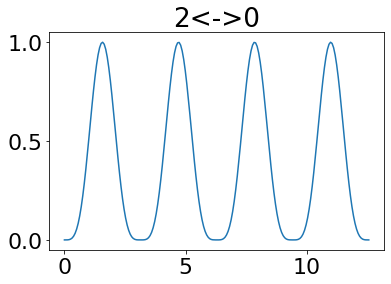

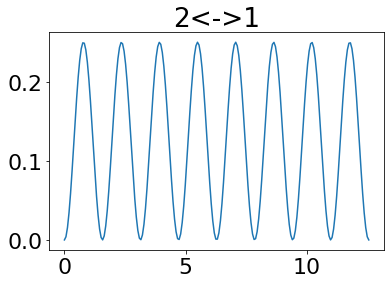

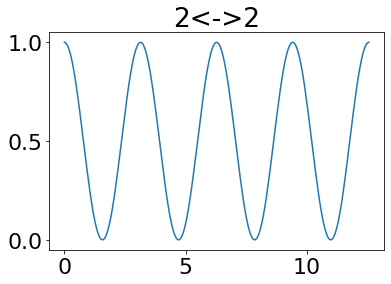

In [26]:
for i in range(0,3):
    for j in range(0,3):
        pl.figure()
        pl.title(str(i)+"<->"+str(j))
        pl.plot(t,ov0[str(i)+"<->"+str(j)])

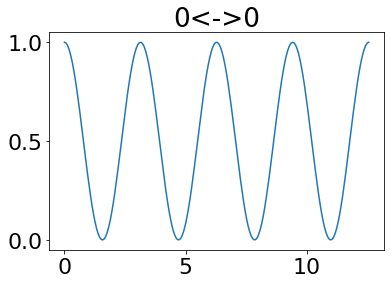

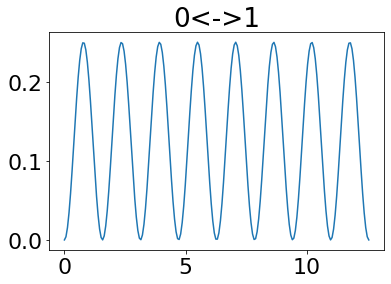

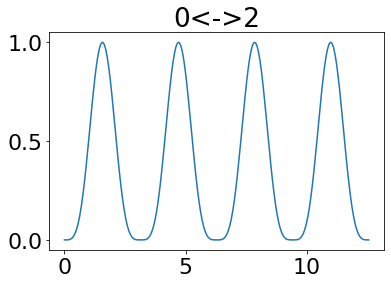

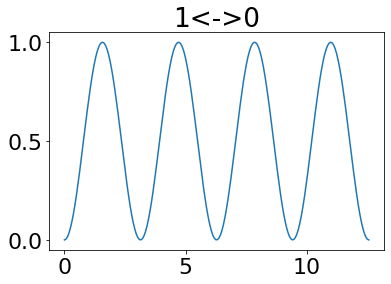

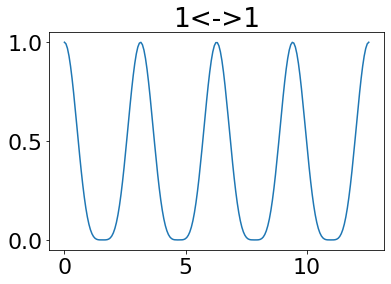

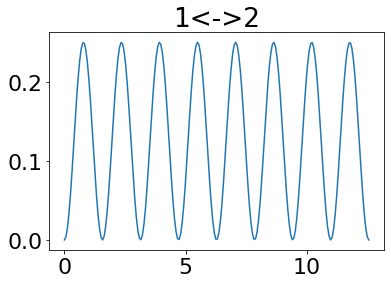

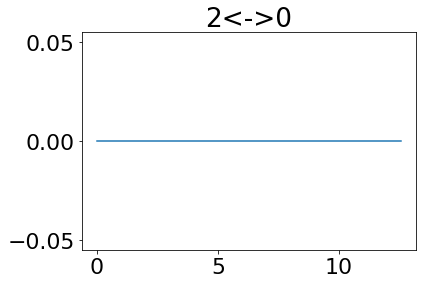

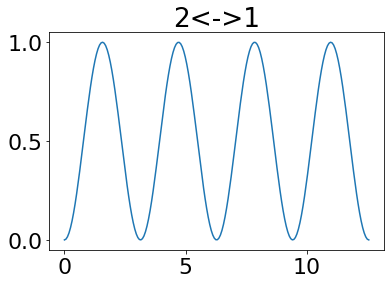

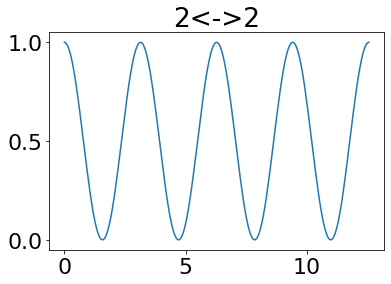

In [27]:
for i in range(0,3):
    for j in range(0,3):
        pl.figure()
        pl.title(str(i)+"<->"+str(j))
        pl.plot(t,ov1[str(i)+"<->"+str(j)])

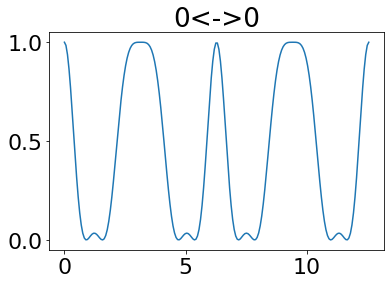

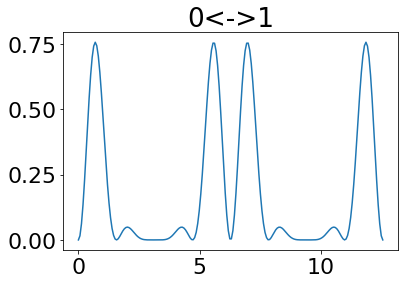

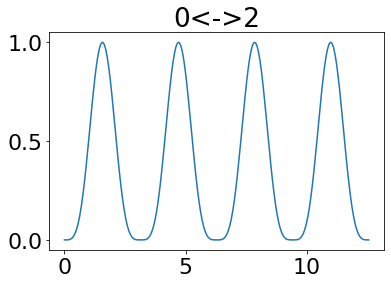

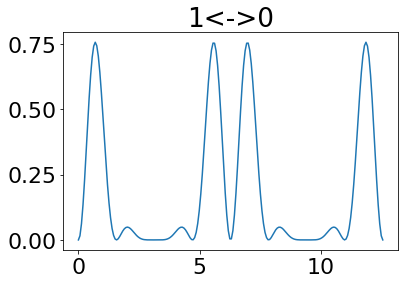

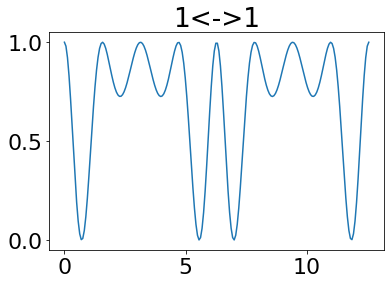

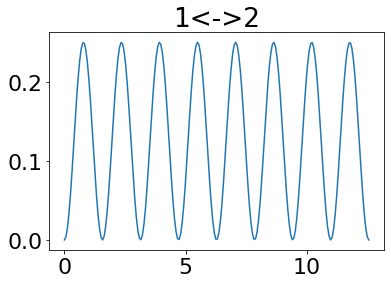

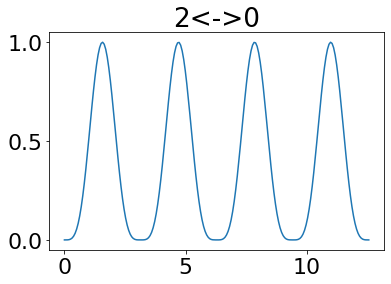

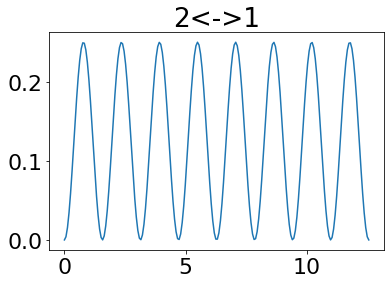

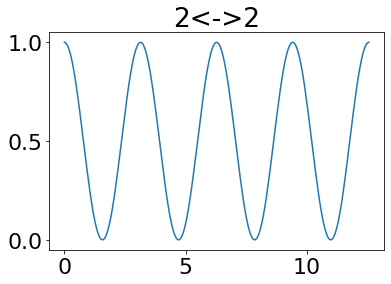

In [28]:
for i in range(0,3):
    for j in range(0,3):
        pl.figure()
        pl.title(str(i)+"<->"+str(j))
        pl.plot(t,ov2[str(i)+"<->"+str(j)])

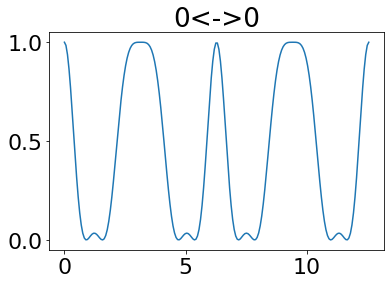

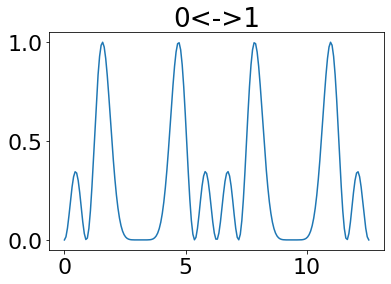

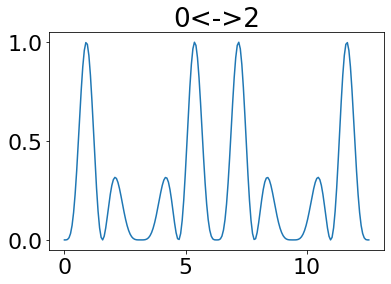

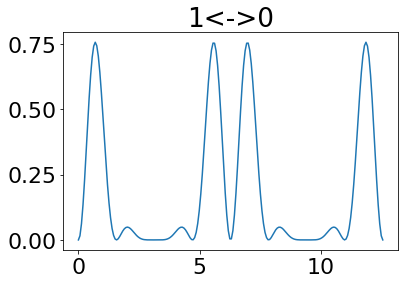

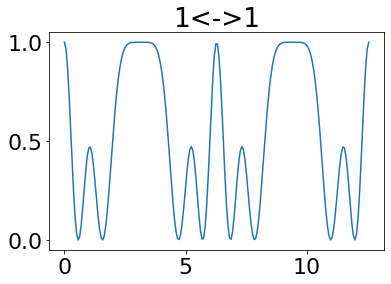

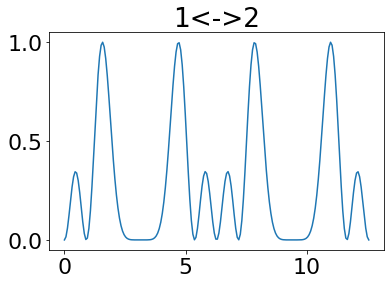

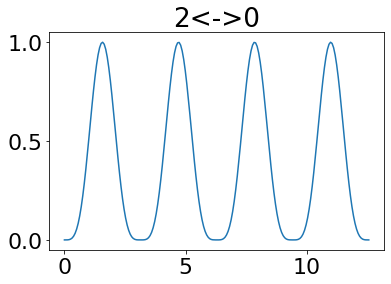

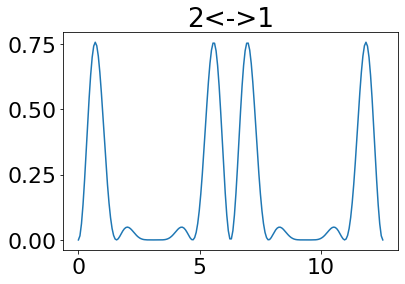

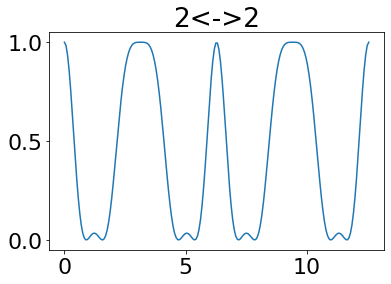

In [29]:
for i in range(0,3):
    for j in range(0,3):
        pl.figure()
        pl.title(str(i)+"<->"+str(j))
        pl.plot(t,ov3[str(i)+"<->"+str(j)])

In [30]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))


In [31]:
pl.rcParams.update({'font.size': 22})

samp=200
t=np.linspace(0,4*np.pi,samp)

vecs={}
vecs['00']=np.array([1,0,0,0])
vecs['01']=np.array([0,1,0,0])
vecs['10']=np.array([0,0,1,0])
vecs['11']=np.array([0,0,0,1])

n=2

T={}
y={}
overlap={}
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full", "overlap_10-11", "random1", "random2", "random3"]:
    print(mode)
    if mode == "overlap_10-11":
        Tm=np.zeros((4,4))
        Tm[3,2]=1
        Tm[2,3]=1
    elif mode == "random1" or mode == "random2" or mode == "random3":
        Tm=np.random.rand(4,4)
        for i in range(0,4):
            for j in range(i,4):
                Tm[i,j]=Tm[j,i]
    else:
        Tm=get_T(2**n,mode)
    T[mode]=Tm
    y[mode]={}
    overlap[mode]={}

states=['00','01','10','11']
for i in range(0,4):
    i_str=states[i]
    for j in range(i,4):
        j_str=states[j]
        for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full", "overlap_10-11", "random1", "random2", "random3"]:
            y[mode][i_str+"<->"+j_str]=np.zeros_like(t)
            overlap[mode][i_str+"<->"+j_str]=np.zeros_like(t)
            for s in range(samp):
                eT=expm(-1j*t[s]*T[mode])
                v1=eT.dot(vecs[i_str])
                v2=vecs[j_str]
                y[mode][i_str+"<->"+j_str][s]=np.abs(np.vdot(v1,v2))**2
#                 overlap[mode][i_str+"<->"+j_str][s]=np.abs(eT[ind_i[j],ind_j[i]])**2
                overlap[mode][i_str+"<->"+j_str][s]=np.abs(eT[i,j])**2
                
                
                
# marker=['o','p','*','v','s','x']
# markersize=[10,10,10,10,10,10]
# # fillstyle=['top','bottom','left','right']

# count=-1
# for i in range(0,4):
#     i_str=states[i]
#     for j in range(i,4):
#         j_str=states[j]
#         count+=1
#         pl.figure(count,figsize=(12,6))
#         ax = pl.gca()
#         ax.spines['top'].set_color('none')
#         ax.spines['bottom'].set_position('zero')
#         ax.spines['left'].set_position('zero')
#         ax.spines['right'].set_color('none')
# #         pl.xlim([0,1])
#         pl.ylim([0,1])
#         ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi / 2))
#         ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
#         ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
#         pl.title(i_str+"<->"+j_str)
#         mi=-1
#         for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#             mi+=1
#             pl.plot(t,y[mode][i_str+"<->"+j_str],label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
#         lgd=pl.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#         pl.savefig("snf_"+i_str+"<->"+j_str+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
     

# for i in range(0,4):
#     i_str=states[i]
#     for j in range(i,4):
#         j_str=states[j]
#         count+=1
#         pl.figure(count,figsize=(12,6))
#         ax = pl.gca()
#         ax.spines['top'].set_color('none')
#         ax.spines['bottom'].set_position('zero')
#         ax.spines['left'].set_position('zero')
#         ax.spines['right'].set_color('none')
# #         pl.xlim([0,1])
#         pl.ylim([0,1])
#         ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi / 2))
#         ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
#         ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
#         pl.title(i_str+"<->"+j_str)
#         mi=-1
#         for mode in ["overlap_10-11", "random1", "random2", "random3"]:
#             mi+=1
#             pl.plot(t,y[mode][i_str+"<->"+j_str],label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
#         lgd=pl.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#         pl.savefig("orrr_"+i_str+"<->"+j_str+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
        
        
    
    
        
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full", "overlap_10-11", "random1", "random2", "random3"]:
#     count+=1
#     pl.figure(count,figsize=(12,6))
#     ax = pl.gca()
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position('zero')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
# #         pl.xlim([0,1])
#     pl.ylim([0,1])
#     pl.title(mode)
#     for i in range(0,4):
#         i_str=states[i]
#         for j in range(i,4):
#             j_str=states[j]
#             pl.plot(t,y[mode][i_str+"<->"+j_str],label=i_str+"<->"+j_str,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
#     pl.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full", "overlap_10-11","random1","random2","random3"]:
#     ymax=-1000*np.ones_like(t)
#     ymin=+1000*np.ones_like(t)
#     for i in range(1,4):
#         i_str=states[i]
#         for j in range(i,4):
#             j_str=states[j]
#             ymax=np.maximum(ymax,y[mode][i_str+"<->"+j_str])
#             ymin=np.minimum(ymin,y[mode][i_str+"<->"+j_str])
            
#     count+=1
#     pl.figure(count,figsize=(12,6))
#     ax = pl.gca()
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position('zero')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
# #         pl.xlim([0,1])
#     pl.ylim([0,1])
#     pl.title(mode)
#     pl.plot(t,ymax,label=mode+' max')
#     pl.plot(t,ymin,label=mode+' min')
#     pl.legend(bbox_to_anchor=(1.04,1), loc="upper left")

standard
nearest_int
nearest_int_cyclic
full
overlap_10-11
random1
random2
random3


In [32]:
# fig, axes = pl.subplots(ncols=2,figsize=(24,6))

# for ax in axes:
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position('zero')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
#     ax.set_ylim([0,1])
#     ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
#     ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
#     ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
# axes[0].set_xlabel(r'$\beta$')
# axes[1].set_xlabel(r'$\beta$')
# axes[0].set_ylabel(r'$|\langle 00|U_M(\beta)|11 \rangle|^2$')
# axes[1].set_ylabel(r'$|\langle 10|U_M(\beta)|11 \rangle|^2$')
# axes[0].set_title(r'$|00\rangle \leftrightarrow |11 \rangle$')
# axes[1].set_title(r'$|10\rangle \leftrightarrow |11 \rangle$')

# marker=['o','p','*','v','s','x']
# markersize=[10,10,10,12,10,10]
# fillstyle=['full','none','none','none','none']
# legend=['standard','nearest int','c nearest int','all-to-all']

# mi=-1
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#     mi+=1
#     axes[0].plot(t,y[mode]["00<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
# lgd=fig.legend(bbox_to_anchor=(0.9,.75), loc="upper left")
# mi=-1
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#     mi+=1
#     axes[1].plot(t,y[mode]["10<->11"],label=mode,marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
# pl.savefig("snf_00<->11-10<->11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [33]:
# fig, axes = pl.subplots(ncols=2,figsize=(24,6))

# for ax in axes:
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position('zero')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
#     ax.set_ylim([0,1])
#     ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
#     ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
#     ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
# axes[0].set_xlabel(r'$\beta$')
# axes[1].set_xlabel(r'$\beta$')
# axes[0].set_ylabel(r'$|\langle z_0|U_M(\beta)|z_3 \rangle|^2$')
# axes[1].set_ylabel(r'$|\langle z_2|U_M(\beta)|z_3 \rangle|^2$')
# axes[0].set_title(r'$|z_0\rangle \leftrightarrow |z_3 \rangle$')
# axes[1].set_title(r'$|z_2\rangle \leftrightarrow |z_3 \rangle$')

# marker=['o','p','*','v','s','x']
# markersize=[4,4,4,4,4,4]
# fillstyle=['full','none','none','none','none']
# legend=['$T_{Ham(1)}$','$T_{\Delta}$','$T_{\Delta,c}$','$T_A$']

# mi=-1
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#     mi+=1
#     axes[0].plot(t,overlap[mode]["00<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
# # lgd=fig.legend(bbox_to_anchor=(0.6,.95), loc="upper left")
# mi=-1
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#     mi+=1
#     axes[1].plot(t,overlap[mode]["10<->11"],label=mode,marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])

# # axes[1].legend()
# # pl.savefig("snf_00<->11-10<->11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# tikzplotlib.save("snf_00<->11-10<->11.tex")

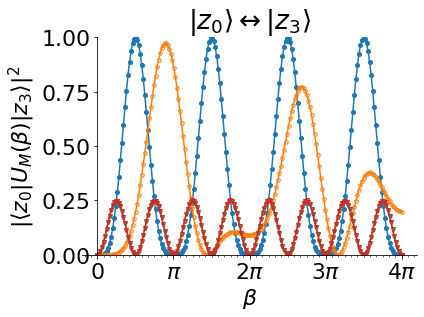

In [34]:
pl.plot(figsize=(12,6))
ax = pl.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_ylim([0,1])
ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
pl.xlabel(r'$\beta$')
pl.ylabel(r'$|\langle z_0|U_M(\beta)|z_3 \rangle|^2$')
pl.title(r'$|z_0\rangle \leftrightarrow |z_3 \rangle$')

marker=['o','p','*','v','s','x']
markersize=[4,4,4,4,4,4]
fillstyle=['full','none','none','none','none']
legend=['$T_{Ham(1)}$','$T_{\Delta}$','$T_{\Delta,c}$','$T_A$']

mi=-1
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
    mi+=1
    pl.plot(t,overlap[mode]["00<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])

# pl.legend()

tikzplotlib.save("snf_00<->11.tex")

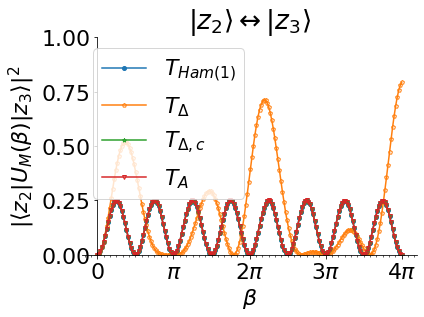

In [35]:
fig=pl.plot(figsize=(12,6))
ax = pl.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_ylim([0,1])
ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
pl.xlabel(r'$\beta$')
pl.ylabel(r'$|\langle z_2|U_M(\beta)|z_3 \rangle|^2$')
pl.title(r'$|z_2\rangle \leftrightarrow |z_3 \rangle$')

marker=['o','p','*','v','s','x']
markersize=[4,4,4,4,4,4]
fillstyle=['full','none','none','none','none']
legend=['$T_{Ham(1)}$','$T_{\Delta}$','$T_{\Delta,c}$','$T_A$']

mi=-1
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
    mi+=1
    pl.plot(t,overlap[mode]["10<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])

pl.legend()

tikzplotlib.save("snf_10<->11.tex")

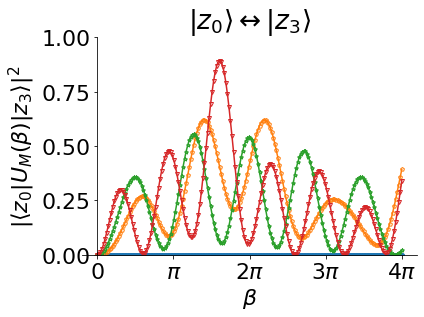

In [36]:
pl.plot(figsize=(12,6))
ax = pl.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_ylim([0,1])
# ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
# ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
# ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
pl.xticks(np.arange(0,5)*np.pi,['$0$','$\pi$','$2\pi$','$3\pi$','$4\pi$'])
pl.xlabel(r'$\beta$')
pl.ylabel(r'$|\langle z_0|U_M(\beta)|z_3 \rangle|^2$')
pl.title(r'$|z_0\rangle \leftrightarrow |z_3 \rangle$')

marker=['o','p','*','v','s','x']
markersize=[4,4,4,4,4,4]
fillstyle=['full','none','none','none','none']
label=['$T_{2\leftrightarrow 3}$','$T_{rand}$','$T_{rand}$','$T_{rand}$']
mi=-1
for mode in ["overlap_10-11", "random1", "random2", "random3"]:
    mi+=1
    pl.plot(t,overlap[mode]["00<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])

# pl.legend()

tikzplotlib.save("orr_00<->11.tex")

In [37]:
fig=pl.plot(figsize=(12,6))
ax = pl.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_ylim([0,1])
pl.
# ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi))
# ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
# ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
pl.xlabel(r'$\beta$')
pl.ylabel(r'$|\langle z_2|U_M(\beta)|z_3 \rangle|^2$')
pl.title(r'$|z_2\rangle \leftrightarrow |z_3 \rangle$')

marker=['o','p','*','v','s','x']
markersize=[4,4,4,4,4,4]
fillstyle=['full','none','none','none','none']
label=['$T_{2\leftrightarrow 3}$','$T_{rand}$','$T_{rand}$','$T_{rand}$']
mi=-1
for mode in ["overlap_10-11", "random1", "random2", "random3"]:
    mi+=1
    pl.plot(t,overlap[mode]["10<->11"],label=legend[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])

pl.legend()

tikzplotlib.save("orr_10<->11.tex")

SyntaxError: invalid syntax (366524030.py, line 8)

In [38]:
# fig, axes = pl.subplots(ncols=2,figsize=(24,6))

# for ax in axes:
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position('zero')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
#     ax.set_ylim([0,1])
#     ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi ))
#     ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
#     ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
# axes[0].set_xlabel(r'$\beta$')
# axes[1].set_xlabel(r'$\beta$')
# axes[0].set_ylabel(r'$|\langle 00|U_M(\beta)|11 \rangle|^2$')
# axes[1].set_ylabel(r'$|\langle 10|U_M(\beta)|11 \rangle|^2$')
# axes[0].set_title(r'$|00\rangle \leftrightarrow |11 \rangle$')
# axes[1].set_title(r'$|10\rangle \leftrightarrow |11 \rangle$')

# marker=['o','p','*','v','s','x']
# markersize=[10,10,10,12,10,10]
# fillstyle=['full','none','none','none','none']
# label=['$10 \leftrightarrow 11$','rand','rand','rand']
# mi=-1
# for mode in ["overlap_10-11", "random1", "random2", "random3"]:
#     mi+=1
#     axes[0].plot(t,y[mode]["00<->11"],label=label[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
# lgd=fig.legend(bbox_to_anchor=(0.9,.75), loc="upper left")
# mi=-1
# for mode in ["overlap_10-11", "random1", "random2", "random3"]:
#     mi+=1
#     axes[1].plot(t,y[mode]["10<->11"],label=mode,marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
# pl.savefig("orrr_00<->11-10<->11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

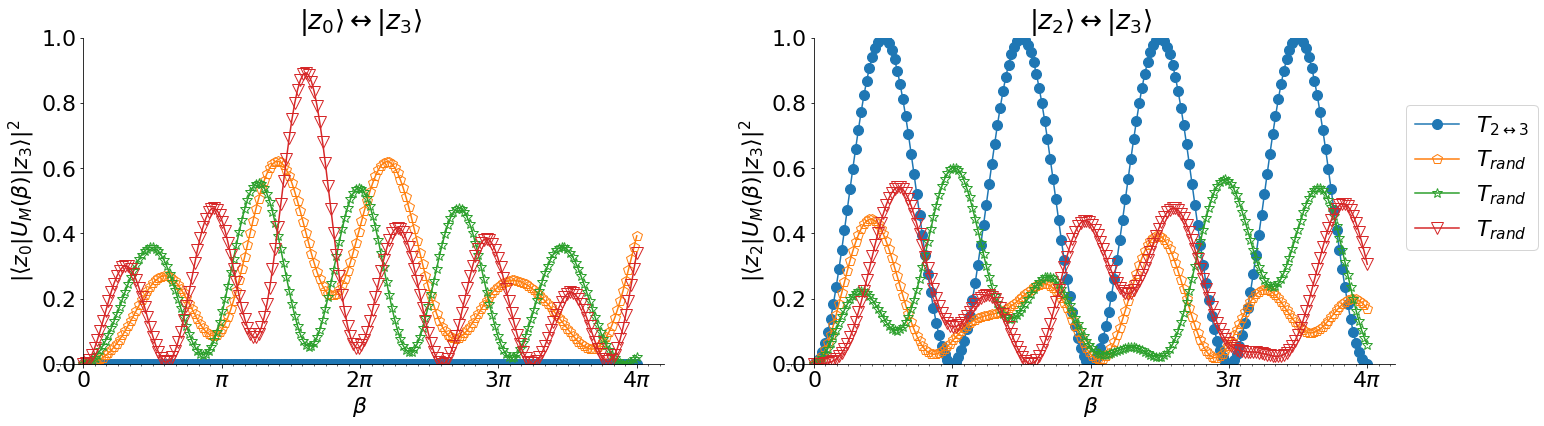

In [39]:
fig, axes = pl.subplots(ncols=2,figsize=(24,6))

for ax in axes:
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.set_ylim([0,1])
    ax.xaxis.set_major_locator(pl.MultipleLocator(np.pi ))
    ax.xaxis.set_minor_locator(pl.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(pl.FuncFormatter(multiple_formatter()))
axes[0].set_xlabel(r'$\beta$')
axes[1].set_xlabel(r'$\beta$')
axes[0].set_ylabel(r'$|\langle z_0|U_M(\beta)|z_3 \rangle|^2$')
axes[1].set_ylabel(r'$|\langle z_2|U_M(\beta)|z_3 \rangle|^2$')
axes[0].set_title(r'$|z_0\rangle \leftrightarrow |z_3 \rangle$')
axes[1].set_title(r'$|z_2\rangle \leftrightarrow |z_3 \rangle$')

marker=['o','p','*','v','s','x']
markersize=[10,10,10,12,10,10]
fillstyle=['full','none','none','none','none']
label=['$T_{2\leftrightarrow 3}$','$T_{rand}$','$T_{rand}$','$T_{rand}$']
mi=-1
for mode in ["overlap_10-11", "random1", "random2", "random3"]:
    mi+=1
    axes[0].plot(t,overlap[mode]["00<->11"],label=label[mi],marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
lgd=fig.legend(bbox_to_anchor=(0.9,.75), loc="upper left")
mi=-1
for mode in ["overlap_10-11", "random1", "random2", "random3"]:
    mi+=1
    axes[1].plot(t,overlap[mode]["10<->11"],label=mode,marker=marker[mi],fillstyle=fillstyle[mi],markersize=markersize[mi])
pl.savefig("orrr_00<->11-10<->11.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
tikzplotlib.save("orrr_00<->11-10<->11.tex")

In [40]:
Id=np.array(([1,0],[0,1]))
Xd=np.array(([0,1],[1,0]))
Zd=np.array(([1,0],[0,-1]))

(1+0j)
{'0': array([1, 0]), '1': array([0, 1]), '+': array([0.5+0.5j, 0.5-0.5j])}


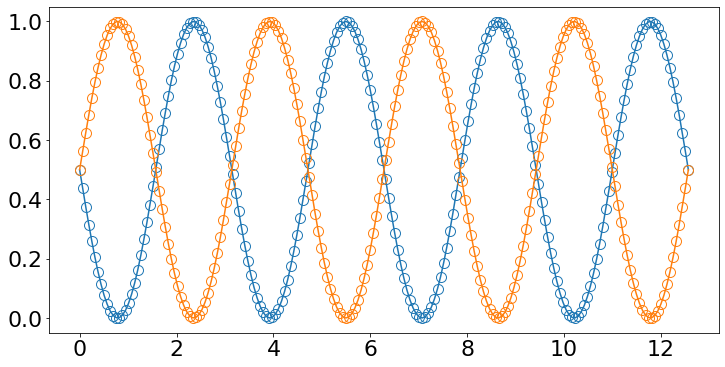

In [41]:
samp=200
t=np.linspace(0,4*np.pi,samp)

vecs={}
vecs['0']=np.array([1,0])
vecs['1']=np.array([0,1])

# gamma=np.random.rand()*2*np.pi
# gamma=4*np.pi/3
# vecs['+']=1/np.sqrt(2)*np.array([1,-1])

# eZ=np.cos(-gamma)*Id+1j*sin(-gamma)*Zd
# vecs['+']=eZ.dot(vecs['+'])


vecs['+']=1/np.sqrt(4)*np.array([1+1j,1-1j])
print(np.vdot(vecs['+'],vecs['+']))
print(vecs)

marker=['o','p','*','v','s','x']
markersize=[10,6,8,12,10,8]
# fillstyle=['top','bottom','left','right']

n=1
i_str='+'
mi=-1
pl.figure(figsize=(12,6))
# for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
mode="standard"
mi+=1
yy1=np.zeros_like(t)
yy2=np.zeros_like(t)
Ttmp=get_T(2,mode)
for i in range(samp):
    eT=expm(-1j*t[i]*Ttmp)
#     eT=np.cos(-t[i])*Id+1j*sin(-t[i])*Xd
#     print(eT)
    v1=eT.dot(vecs[i_str])
#         v2=vecs[j_str]
#             y[mode][i_str+"<->"+j_str][i]=np.abs(np.vdot(v1,v2))**2
#             print(np.vdot(v1[0],v1[0]))
#         print(v1[0]*np.conj(v1[0]))
    yy1[i]=np.abs(np.vdot(v1[0],v1[0]))
    yy2[i]=np.abs(np.vdot(v1[1],v1[1]))
pl.plot(t,yy1,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
pl.plot(t,yy2,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
# print(yy)

[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


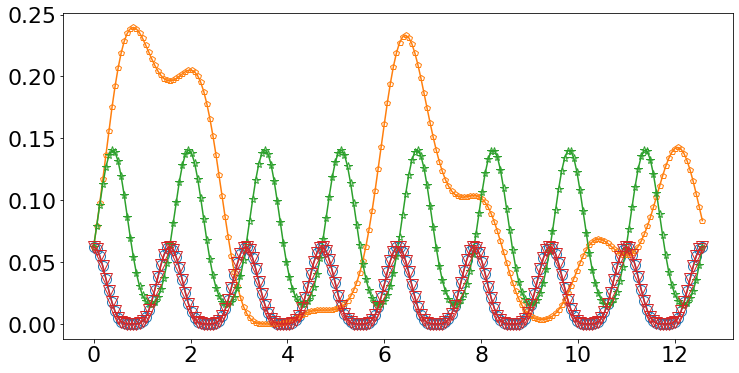

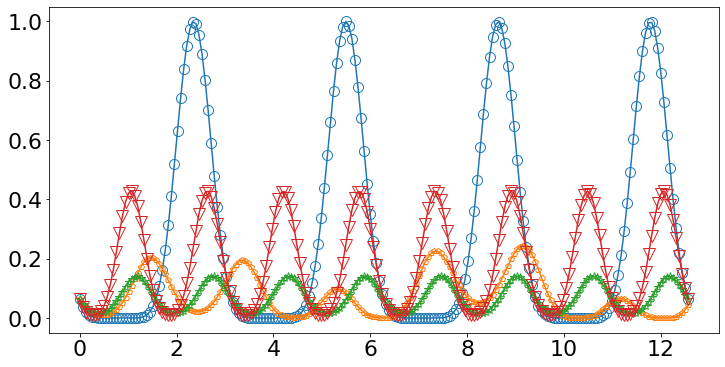

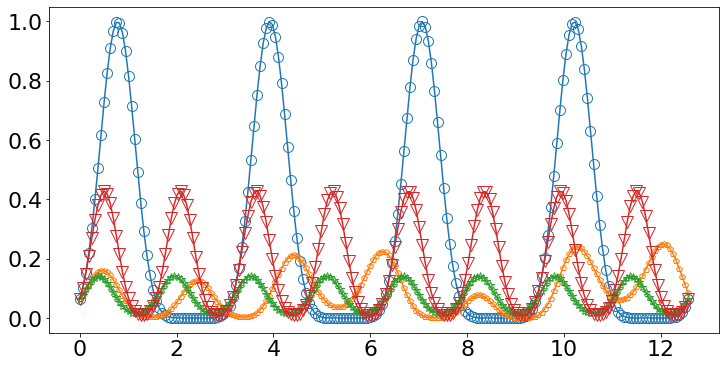

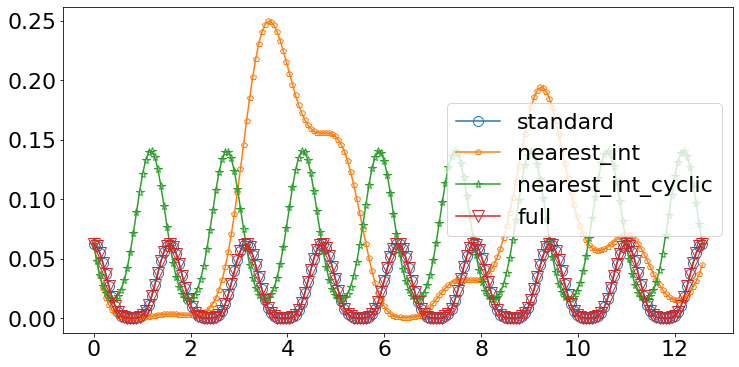

In [42]:
samp=200
t=np.linspace(0,4*np.pi,samp)

vecs={}
vecs['00']=np.array([1,0,0,0])
vecs['01']=np.array([0,1,0,0])
vecs['10']=np.array([0,0,1,0])
vecs['11']=np.array([0,0,0,1])

gamma=0#np.random.rand()*2*np.pi
vZ=1/np.sqrt(4)*np.array([1+1j,1-1j])
vZ2=1/np.sqrt(4)*np.array([1-1j,1+1j])
vecs['++']=np.kron(vZ,vZ2)

marker=['o','p','*','v','s','x']
markersize=[10,6,8,12,10,8]
# fillstyle=['top','bottom','left','right']

n=2
i_str='++'
mi=-1
pl.figure(1,figsize=(12,6))
pl.figure(2,figsize=(12,6))
pl.figure(3,figsize=(12,6))
pl.figure(4,figsize=(12,6))
for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
    print(T[mode])
    mi+=1
    yy1=np.zeros_like(t)
    yy2=np.zeros_like(t)
    yy3=np.zeros_like(t)
    yy4=np.zeros_like(t)
    for i in range(samp):
        eT=expm(-1j*t[i]*T[mode])
        v1=eT.dot(vecs[i_str])
#         v2=vecs[j_str]
#             y[mode][i_str+"<->"+j_str][i]=np.abs(np.vdot(v1,v2))**2
#             print(np.vdot(v1[0],v1[0]))
        yy1[i]=np.abs(np.vdot(v1[0],v1[0]))**2
        yy2[i]=np.abs(np.vdot(v1[1],v1[1]))**2
        yy3[i]=np.abs(np.vdot(v1[2],v1[2]))**2
        yy4[i]=np.abs(np.vdot(v1[3],v1[3]))**2
    pl.figure(1)
    pl.plot(t,yy1,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
    pl.figure(2)
    pl.plot(t,yy2,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
    pl.figure(3)
    pl.plot(t,yy3,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
    pl.figure(4)
    pl.plot(t,yy4,label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
#             print(mode,np.vdot(v1,v2))
pl.legend(loc=7)

                
                
                

# count=-1
# i_str='++'
# for j in range(4):
#     j_str=states[j]
#     count+=1
#     pl.figure(count,figsize=(12,6))
#     pl.title(i_str+"<->"+j_str)
#     mi=-1
#     for mode in ["standard", "nearest_int", "nearest_int_cyclic", "full"]:
#         mi+=1
#         pl.plot(t,y[mode][i_str+"<->"+j_str],label=mode,marker=marker[mi],fillstyle='none',markersize=markersize[mi])
#     pl.legend()

[1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 6, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 7, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 6, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 8, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 6, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 7, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 6, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 5, 1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1, 8]


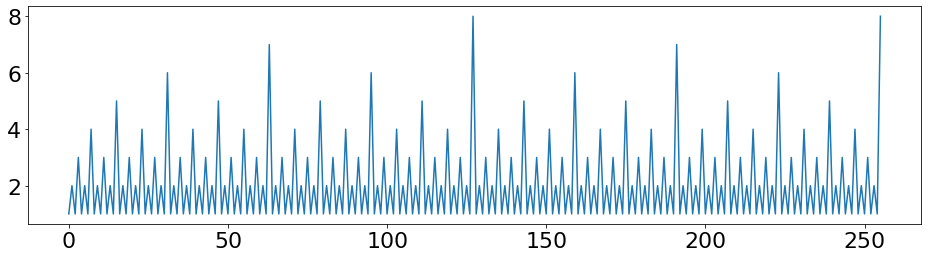

In [43]:
n=8
x=[]
for i in range(2**n):
    j=(i+1)%2**n
    s1="{0:b}".format(i).zfill(n)
    s2="{0:b}".format(j).zfill(n)
    d=hamming(s1,s2)
    x.append(d)
#     print(s1,s2,d)
import matplotlib.pyplot as pl
pl.figure(figsize=(16,4))
pl.plot(x)
print(x)

In [44]:
pl.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
sI=np.array(([1,0],[0,1]))
sX=np.array(([0,1],[1,0]))
sY=np.array(([0,-1j],[1j,0]))
sZ=np.array(([1,0],[0,-1]))

z=np.array(([1,0]))
o=np.array(([0,1]))

v={}
v['0']=np.kron(np.kron(z,z),z)
v['1']=np.kron(np.kron(z,z),o)
v['2']=np.kron(np.kron(z,o),z)
v['3']=np.kron(np.kron(z,o),o)
v['4']=np.kron(np.kron(o,z),z)
v['5']=np.kron(np.kron(o,z),o)
v['6']=np.kron(np.kron(o,o),z)
v['7']=np.kron(np.kron(o,o),o)

# display(v100,v010,v001)

IXX=np.kron(np.kron(sI,sX),sX)
XIX=np.kron(np.kron(sX,sI),sX)
XXI=np.kron(np.kron(sX,sX),sI)

IYY=np.kron(np.kron(sI,sY),sY)
YIY=np.kron(np.kron(sY,sI),sY)
YYI=np.kron(np.kron(sY,sY),sI)

In [46]:
pl.rcParams.update({'font.size': 22})

samp=200
t=np.linspace(0,4*np.pi,samp)

T={}
T["X_12_23_31"]=XXI+IXX+XIX
T["Y_12_23_31"]=YYI+IYY+YIY
T["X_12_23"]=XXI+IXX
T["Y_12_23"]=YYI+IYY
T["XY_12"]=XXI+YYI
T["XY_23"]=IXX+IYY
T["XY_31"]=XIX+YIY

overlap={}
overlap["exact_XY_12_23_31"]={}
overlap["exact_XY_12_23"]={}
overlap["trott_XY_12+23+31"]={}
overlap["trott_XY_12+23"]={}
overlap["trott_X+Y_12_23_31"]={}
overlap["trott_X+Y_12_23"]={}

for i in range(0,2**3):
    print(i)
    v1=v[str(i)]
    for j in range(0,2**3):
        v2=v[str(j)]
        overlap["exact_XY_12_23_31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["exact_XY_12_23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_XY_12+23+31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_XY_12+23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_X+Y_12_23_31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_X+Y_12_23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        for s in range(samp):
            eT=expm(-1j*t[s]*(T["X_12_23_31"]+T["Y_12_23_31"]))
            overlap["exact_XY_12_23_31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eT=expm(-1j*t[s]*(T["X_12_23"]+T["Y_12_23"]))
            overlap["exact_XY_12_23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            
            eXY12=expm(-1j*t[s]*(T["XY_12"]))
            eXY23=expm(-1j*t[s]*(T["XY_23"]))
            eXY31=expm(-1j*t[s]*(T["XY_31"]))
            eT=np.matmul(np.matmul(eXY12,eXY23),eXY31)
            overlap["trott_XY_12+23+31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eT=np.matmul(eXY12,eXY23)
            overlap["trott_XY_12+23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            
            eX_12_23_31=expm(-1j*t[s]*(T["X_12_23_31"]))
            eY_12_23_31=expm(-1j*t[s]*(T["Y_12_23_31"]))
            eT=np.matmul(eX_12_23_31,eY_12_23_31)
            overlap["trott_X+Y_12_23_31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eX_12_23=expm(-1j*t[s]*(T["X_12_23"]))
            eY_12_23=expm(-1j*t[s]*(T["Y_12_23"]))
            eT=np.matmul(eX_12_23,eY_12_23)
            overlap["trott_X+Y_12_23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2

0
1
2
3
4
5
6
7


In [47]:
IXX.dot(v['4'])-v['7'], IYY.dot(v['7']), np.matmul(IYY,IXX).dot(v['4'])+v['4']

(array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j]),
 array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]))

In [48]:
for case in ["trott_XY_12+23", "trott_XY_12+23+31", "trott_X+Y_12_23"]:
    print()
    print(case)
    for i in range(0,2**3):
        for j in range(0,2**3):
            m=np.max(overlap[case][str(i)+"<->"+str(j)])
            st=str(i)+"<->"+str(j)+":"+str(m)
            if i==j:
                continue
            onehoti=(i==1 or i==2 or i==4)
            onehotj=(j==1 or j==2 or j==4)
            if ((onehoti and onehotj) and math.isclose(m,0,abs_tol=1e-7)):
                print("\x1b[31m"+st+"\x1b[0m")
            elif ((onehoti and onehotj) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[32m"+st+"\x1b[0m")
            elif ((onehoti and onehotj) and (math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")
            elif ((onehoti and (not onehotj)) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")
            elif (((not onehoti) and onehotj) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")


trott_XY_12+23
1<->2:0.24998442368970755
1<->4:0.9998753933996
2<->1:0.9999376947588275
2<->4:0.24998442368970755
4<->1:0.0
4<->2:0.9999376947588275

trott_XY_12+23+31
1<->2:0.9998753972813001
1<->4:0.3848540703520528
2<->1:0.9999376947588267
2<->4:0.2499844236897071
4<->1:0.249984423689707
4<->2:0.3848540703520528

trott_X+Y_12_23
1<->2:0.42185161187299347
1<->4:0.2499688483499007
1<->7:0.4217817372339912
2<->1:0.4218516118729932
2<->4:0.4218516118729931
2<->7:0.24996884834989982
4<->1:0.24996884834990005
4<->2:0.4218516118729931
4<->7:0.4217817372339913
7<->1:0.4217817372339915
7<->2:0.2499688483499
7<->4:0.42178173723399165
